In [137]:
'''Import required modules.'''
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
import seaborn as sns            
import missingno as mn           # For visualizing missing values.
from scipy import stats          # For statistics

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'gender_submission.csv', 'test.csv']


In [138]:
'''Customize visualization.'''
plt.rcParams['figure.figsize'] = [18,2.5]  # Create all the figure size by this dimension
plt.style.use('ggplot')                    # Use ggplot's style for plotting
sns.set_style({'axes.grid' : False})       # Removes gridlines

'''Displays markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

'''Ignores deprecation warning.'''
def ignore_warnings():
    import warnings
    warnings.filterwarnings('ignore', category = DeprecationWarning)     

In [139]:
'''Read and preview the train data from csv file.'''
train = pd.read_csv('../input/train.csv')
bold('**Our train data:**')
display(train.head())

'''Read and preview the test from csv file.'''
test = pd.read_csv('../input/test.csv')
bold('**Our test data:**')
display(test.head())


**Our train data:**

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Our test data:**

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [140]:
'''Merge train and test data together. This eliminates the hassle of handling train and test data seperately for various analysis.'''
merged = pd.concat([train, test], sort = False)
bold('**Merged data:**')
display(merged.head())

'''Shape of the combined data'''
bold('**Shape of the merged data:**')
display(merged.shape)

'''Variables in the combined data'''
bold('**Name of the variables:**')
display(merged.columns)

**Merged data:**

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Shape of the merged data:**

(1309, 12)

**Name of the variables:**

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [141]:
'''Pandas data types for our different variables.'''
bold('**Data types of our variables:**')
display(merged.dtypes)

**Data types of our variables:**

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [142]:
'''To analyse categorical variables, we will create three custom functions.
The first two functions displays bar labels in absolute and relative scale respectively. And the 3rd one creates a dataframe of absolute and relative and also generates abs and relative frequency plot for each variable.'''

''' #1.Function for displaying bar labels in absolute scale.'''
def abs_bar_labels():
    plt.ylabel('Absolute Frequency')
    plt.xticks(rotation = 0)
    plt.yticks([])
    # Set individual bar lebels in absolute number
    for x in ax.patches:
        ax.annotate(x.get_height(), 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = 14, color = 'black')
    
'''#2.Function for displaying bar lebels in relative scale.'''
def pct_bar_labels():
    plt.ylabel('Relative Frequency (%)')
    plt.xticks(rotation = 0)
    plt.yticks([])   
    # Set individual bar lebels in proportional scale
    for x in ax1.patches:
        ax1.annotate(str(x.get_height()) + '%', 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = 14, color = 'black')
         
'''#3.Function to create a dataframe of absolute and relative frequency of each variable. And plot absolute and relative frequency.'''
def absolute_and_relative_freq(variable):
    global  ax, ax1 
    # Dataframe of absolute and relative frequency
    absolute_frequency = variable.value_counts()
    # Will be multiplied by 100 and rounded to 2 decimal points for percentage
    relative_frequency = round(variable.value_counts(normalize = True)*100, 2) 
    df = pd.DataFrame({'Absolute Frequency':absolute_frequency, 'Relative Frequency(%)':relative_frequency})
    # This portion plots absolute frequency with bar labeled.
    ax =  absolute_frequency.plot.bar()
    plt.title('Absolute Frequency of %s' %variable.name) # Prints variable name as title in matplotlib
    abs_bar_labels()  # Displays bar labels in abs scale.
    plt.show()
    # This portion plots relative frequency with bar labeled.
    ax1 = relative_frequency.plot.bar()
    plt.title('Relative Frequency of %s' %variable.name)
    pct_bar_labels()
    plt.show()
    print('Absolute & Relative Frequency of',variable.name,':')
    return display(df)

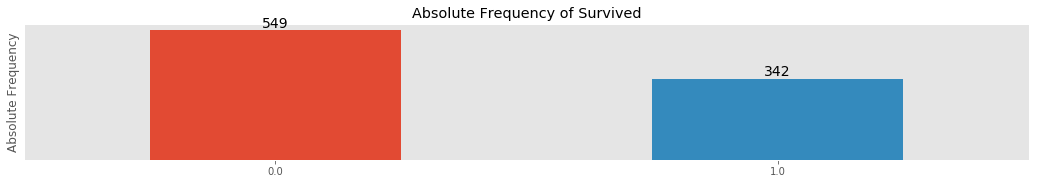

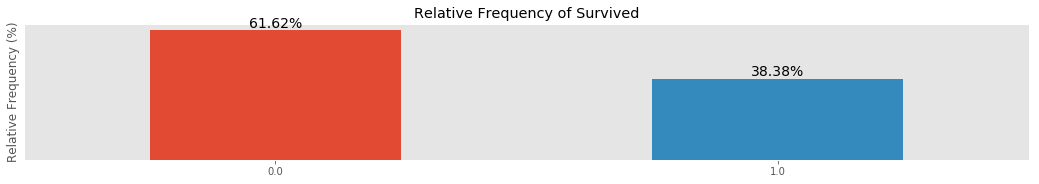

Absolute & Relative Frequency of Survived :


,Absolute Frequency,Relative Frequency(%)
0.0,549,61.62
1.0,342,38.38


In [143]:
'''Plot and count the number of survivors and victims in absolute and relative scale in the tragedy.'''
merged.Survived.agg(absolute_and_relative_freq, axis = 0)

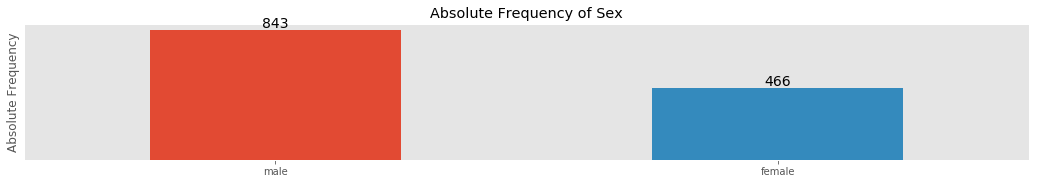

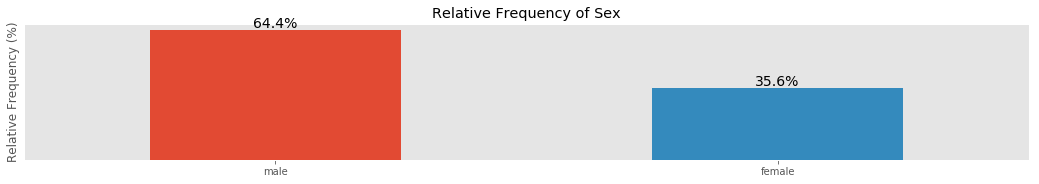

Absolute & Relative Frequency of Sex :


,Absolute Frequency,Relative Frequency(%)
male,843,64.4
female,466,35.6


In [144]:
'''Plot and count the absolute and relative frequency of Sex.'''
merged.Sex.agg(absolute_and_relative_freq)

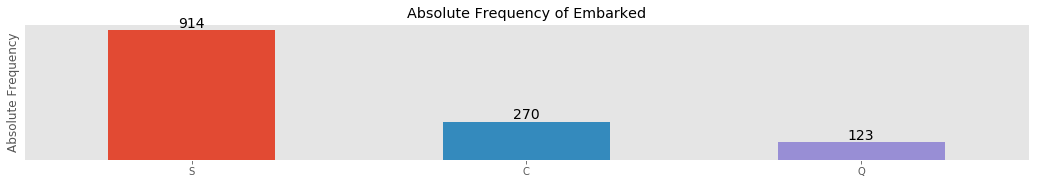

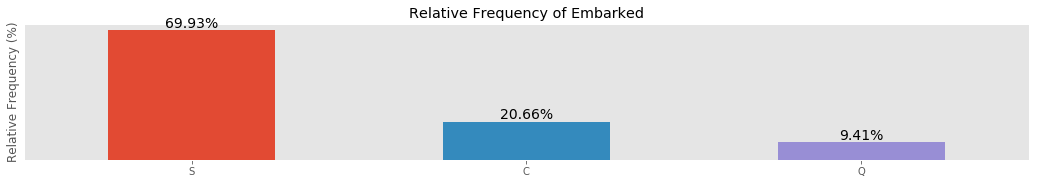

Absolute & Relative Frequency of Embarked :


,Absolute Frequency,Relative Frequency(%)
S,914,69.93
C,270,20.66
Q,123,9.41


In [145]:
'''Plot and count the absolute and relative frequency of Embarked.'''
merged.Embarked.agg(absolute_and_relative_freq)

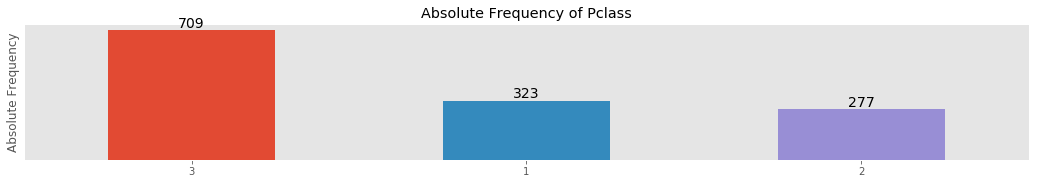

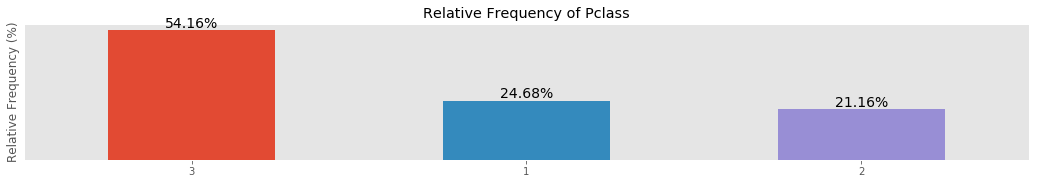

Absolute & Relative Frequency of Pclass :


,Absolute Frequency,Relative Frequency(%)
3,709,54.16
1,323,24.68
2,277,21.16


In [146]:
'''Plot and count the absolute and relative frequency of Pclass.'''
merged.Pclass.agg(absolute_and_relative_freq)

In [147]:
'''Absolute frequency of Cabin.'''
abs_freq_cabin = merged.Cabin.value_counts(dropna = False)
bold('**Categories of Cabin:**')
display(abs_freq_cabin.head())

"""As frequency of Cabin isn't what we expected, let's count total categories in Cabin."""
bold('**Total categories in Cabin:**')
display(abs_freq_cabin.count())

'''Finally preview the variable Cabin to see what is causing the irregularity.'''
bold('**Preview Cabin:**')
display(merged.Cabin.head(7))

**Categories of Cabin:**

NaN                1014
C23 C25 C27           6
G6                    5
B57 B59 B63 B66       5
C22 C26               4
Name: Cabin, dtype: int64

**Total categories in Cabin:**

187

**Preview Cabin:**

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
Name: Cabin, dtype: object

In [148]:
'''Count total categories in Name.'''
bold('**Total categories in Name:**')
display(merged.Name.value_counts().count())

"""Let's finally check the what's inside the variable Name."""
bold('**Preview Name:**')
display(merged.Name.head())

**Total categories in Name:**

1307

**Preview Name:**

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [149]:
'''Count total groups in variable Ticket.'''
bold('**Total groups in Ticket:**')
display(merged.Ticket.value_counts().count())

'''Lets investigate Ticket.'''
bold('**Preview of Ticket:**')
display(merged.Ticket.head())

**Total groups in Ticket:**

929

**Preview of Ticket:**

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

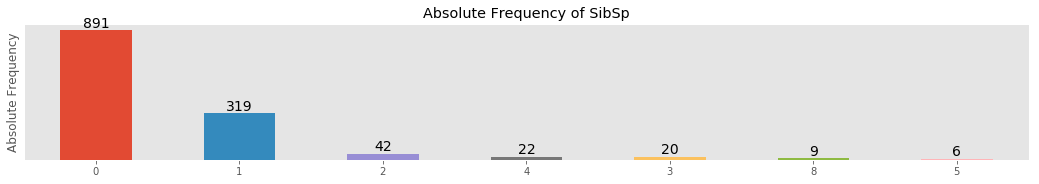

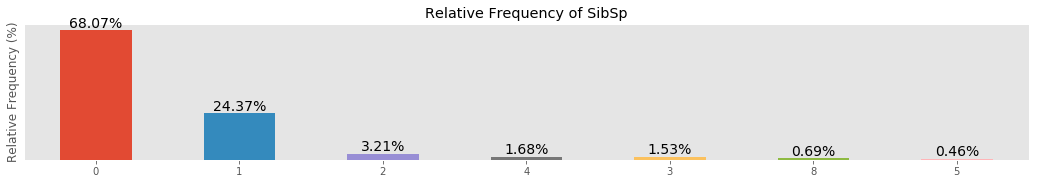

Absolute & Relative Frequency of SibSp :


,Absolute Frequency,Relative Frequency(%)
0,891,68.07
1,319,24.37
2,42,3.21
4,22,1.68
3,20,1.53
8,9,0.69
5,6,0.46


In [150]:
'''Plot and count the absolute and relative frequency of SibSp.'''
merged.SibSp.agg(absolute_and_relative_freq)

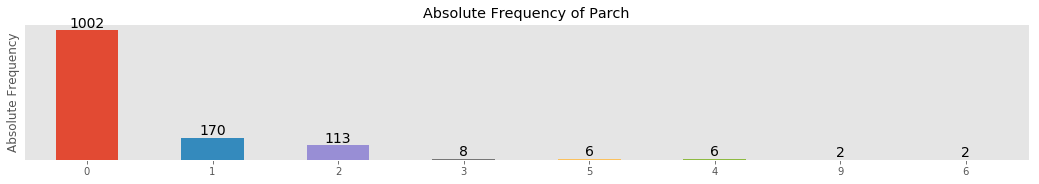

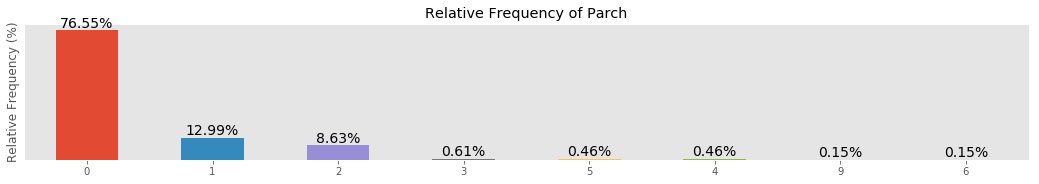

Absolute & Relative Frequency of Parch :


,Absolute Frequency,Relative Frequency(%)
0,1002,76.55
1,170,12.99
2,113,8.63
3,8,0.61
5,6,0.46
4,6,0.46
9,2,0.15
6,2,0.15


In [151]:
'''Plot and count the absolute and relative frequency of Parch.'''
merged.Parch.agg(absolute_and_relative_freq)

In [152]:
'''To analyse numerical variables, we will create two custom functions.
The 1st one will calculate summary statistics and plot histogram for each numerical variable.
And the 2nd function will plot kernel density plot and calculate skewness for each numerical variable.''' 

'''#1.Summary statistics with histogram'''
def summary_stats_and_hist(variable):
    global ax
    stats = variable.describe()
    ax = variable.plot.hist()
    plt.xlabel('%s' %variable.name)
    plt.title('Distribution of %s with Histogram' %variable.name)
    abs_bar_labels()
    print('Summary Statistics of', variable.name, ':')
    return display(stats)

'''#2.Density plot with skewness.'''
def density_plot_and_skewness(variable):
    variable.plot.hist(density = True)
    variable.plot.kde(style = 'k--')
    plt.xlabel('%s'%variable.name)
    plt.title('Distribution of %s with Density Plot & Histogram' %variable.name)
    print('Skewness of ', variable.name, ':')
    skewness = variable.skew()
    return display(skewness)

Summary Statistics of Fare :


count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

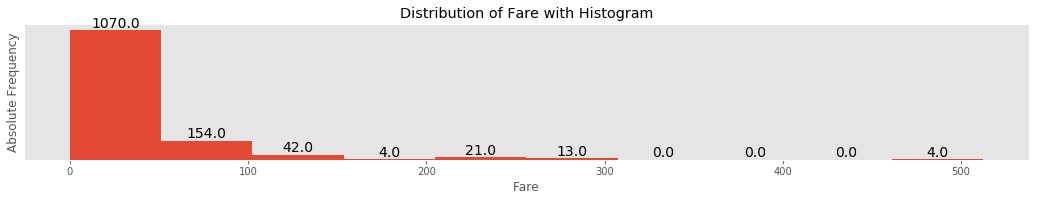

In [153]:
'''Calculate summary statistics of Fare with histogram.'''
merged.Fare.agg(summary_stats_and_hist)

Skewness of  Fare :


4.367709134122922

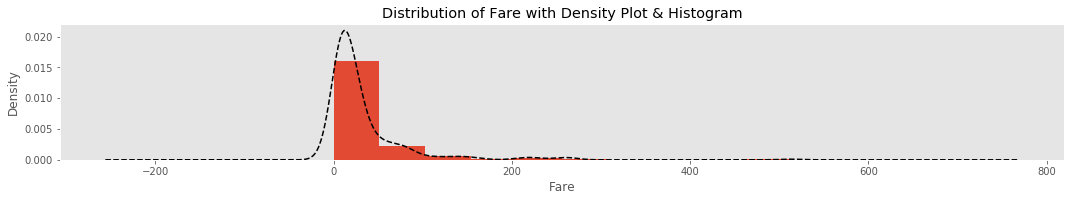

In [154]:
'''Plot density plot of Fare and calculate skewness.'''
merged.Fare.agg(density_plot_and_skewness)

Summary Statistics of Age :


count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

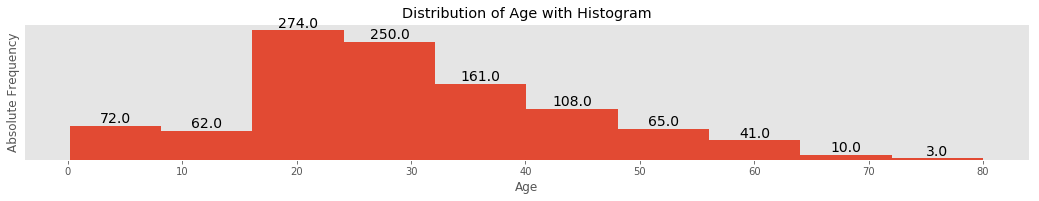

In [155]:
'''Calculate summary statistics of Age with histogram.'''
merged.Age.agg(summary_stats_and_hist)

Skewness of  Age :


0.40767455974362266

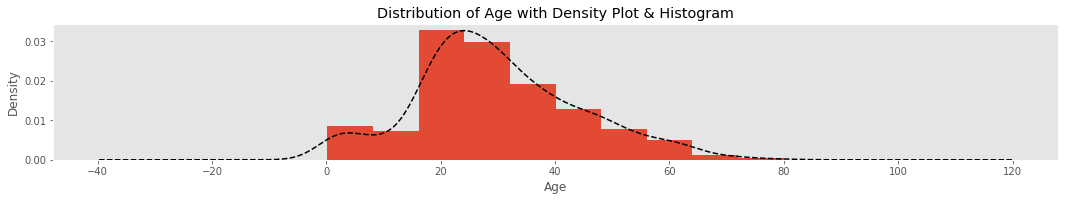

In [156]:
'''Plot density plot of Age and calculate skewness.'''
merged.Age.agg(density_plot_and_skewness)

In [157]:
'''What does passengerId contain?'''
display(merged.PassengerId.head())

0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64

In [158]:
"""Let's preview the Cabin again."""
bold('**Cabin preview:**')
display(merged.Cabin.head())

"""It seems Cabin contains some missing values. Let's count them."""
bold('**Missing values in Cabin:**')
display(merged.Cabin.isnull().sum())

'''Total categories in Cabin before processing.'''
bold('**Total categories in Cabin before processing:**')
display(merged.Cabin.value_counts(dropna = False).count())

**Cabin preview:**

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

**Missing values in Cabin:**

1014

**Total categories in Cabin before processing:**

187

X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

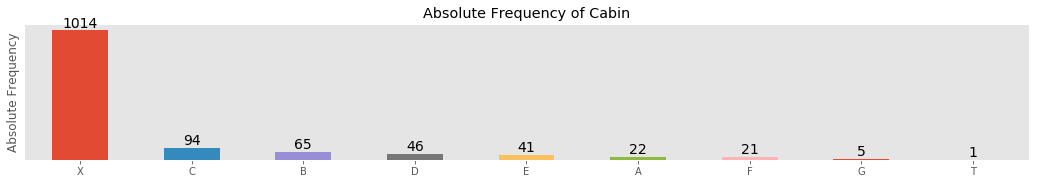

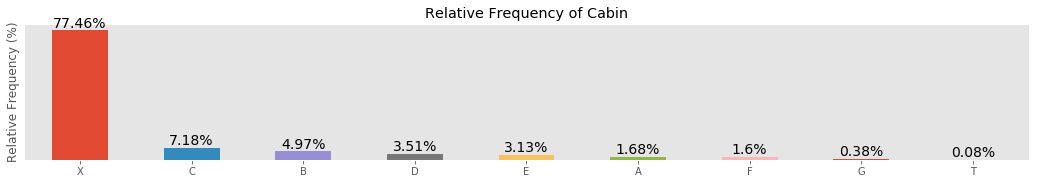

Absolute & Relative Frequency of Cabin :


,Absolute Frequency,Relative Frequency(%)
X,1014,77.46
C,94,7.18
B,65,4.97
D,46,3.51
E,41,3.13
A,22,1.68
F,21,1.60
G,5,0.38
T,1,0.08


In [159]:
"""Flag all the NaNs of Cabin as 'X'."""
merged.Cabin.fillna(value = 'X', inplace = True)

'''Keep only the 1st character where Cabin is alphanumerical.'''
merged.Cabin = merged.Cabin.apply( lambda x : x[0])
display(merged.Cabin.value_counts())

'''After processing, we can visualize the absolute and relative frequency of newly transformed Cabin variable.'''
merged.Cabin.agg(absolute_and_relative_freq)

In [160]:
"""Lets see what's inside the Name."""
display(merged.Name.head(8))

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
Name: Name, dtype: object

In [161]:
'''Create a new variable Title that extracts titles from Name.'''
merged['Title'] = merged.Name.str.extract('([A-Za-z]+)\.')

'''Count the extracted categories of Title from Name.'''
display(merged.Title.value_counts())

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Mlle          2
Ms            2
Major         2
Capt          1
Sir           1
Dona          1
Countess      1
Lady          1
Don           1
Mme           1
Jonkheer      1
Name: Title, dtype: int64

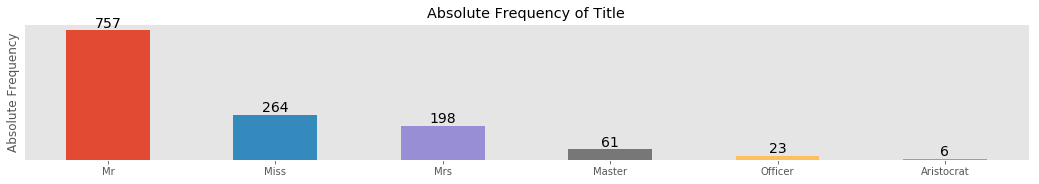

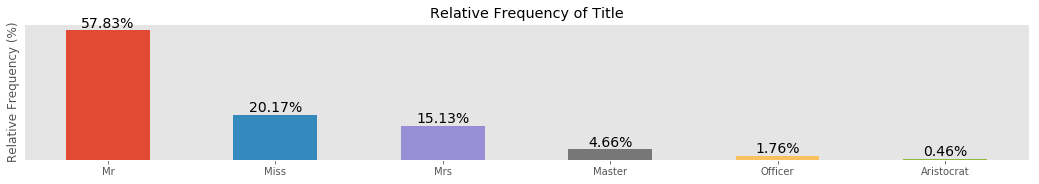

Absolute & Relative Frequency of Title :


,Absolute Frequency,Relative Frequency(%)
Mr,757,57.83
Miss,264,20.17
Mrs,198,15.13
Master,61,4.66
Officer,23,1.76
Aristocrat,6,0.46


In [162]:
'''Create a bucket Officer and put Dr, Rev, Col, Major, Capt titles into it.'''
merged.Title.replace(to_replace = ['Dr', 'Rev', 'Col', 'Major', 'Capt'], value = 'Officer', inplace = True)

'''Put Dona, Jonkheer, Countess, Sir, Lady, Don in bucket Aristocrat.'''
merged.Title.replace(to_replace = ['Dona', 'Jonkheer', 'Countess', 'Sir', 'Lady', 'Don'], value = 'Aristocrat', inplace = True)

'''Finally Replace Mlle and Ms with Miss. And Mme with Mrs.'''
merged.Title.replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}, inplace = True)

'''After processing, visualise and count absolute and relative frequency of transformed Title.'''
merged.Title.agg(absolute_and_relative_freq)

In [163]:
'''Merge SibSp and Parch to create a variable Family_size.'''
merged['Family_size'] = merged.SibSp + merged.Parch + 1  # Adding 1 for single person
display(merged.Family_size.value_counts())

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family_size, dtype: int64

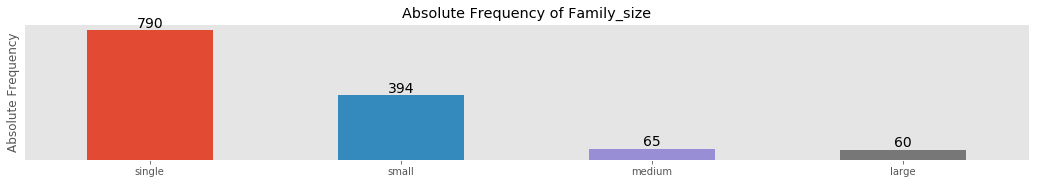

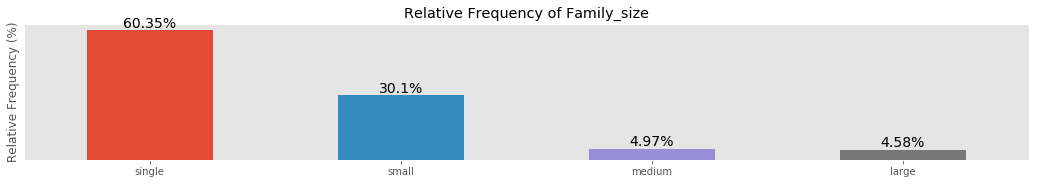

Absolute & Relative Frequency of Family_size :


,Absolute Frequency,Relative Frequency(%)
single,790,60.35
small,394,30.10
medium,65,4.97
large,60,4.58


In [164]:
'''Create buckets of single, small, medium, and large and then put respective values into them.'''
merged.Family_size.replace(to_replace = [1], value = 'single', inplace = True)
merged.Family_size.replace(to_replace = [2,3], value = 'small', inplace = True)
merged.Family_size.replace(to_replace = [4,5], value = 'medium', inplace = True)
merged.Family_size.replace(to_replace = [6, 7, 8, 11], value = 'large', inplace = True)

'''After processing, visualise and count the absolute and relative frequency of engineered Family_size.'''
merged.Family_size.agg(absolute_and_relative_freq)

In [165]:
"""Let's preview the variable Ticket first."""
display(merged.Ticket.head())

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [166]:
'''Assign N if there is only number and no character. If there is a character, extract the character only.'''
ticket = []
for x in list(merged.Ticket):
    if x.isdigit():
        ticket.append('N')
    else:
        ticket.append(x.replace('.','').replace('/','').strip().split(' ')[0])
        
'''Swap values'''
merged.Ticket = ticket

'''Count the categories in Ticket.'''
bold('**Categories of Ticket:**')
display(merged.Ticket.value_counts())

**Categories of Ticket:**

N          957
PC          92
CA          68
A5          28
SOTONOQ     24
WC          15
STONO       14
SCPARIS     14
A4          10
FCC          9
C            8
SOC          8
SOPP         7
STONO2       7
SCParis      5
SCAH         5
WEP          4
PP           4
LINE         4
SOTONO2      3
FC           3
SCA4         2
SWPP         2
SC           2
PPP          2
AQ4          1
SCOW         1
SOP          1
AS           1
STONOQ       1
A            1
SCA3         1
AQ3          1
LP           1
Fa           1
CASOTON      1
SP           1
Name: Ticket, dtype: int64

N    957
S     98
P     98
C     77
A     42
W     19
F     13
L      5
Name: Ticket, dtype: int64

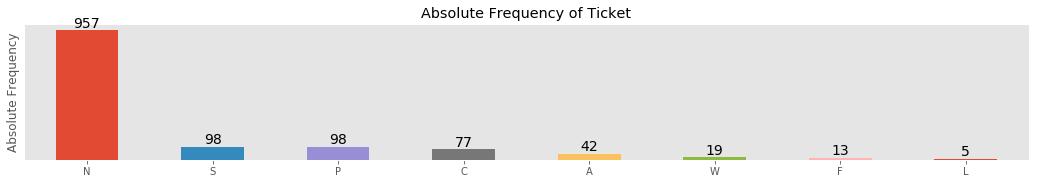

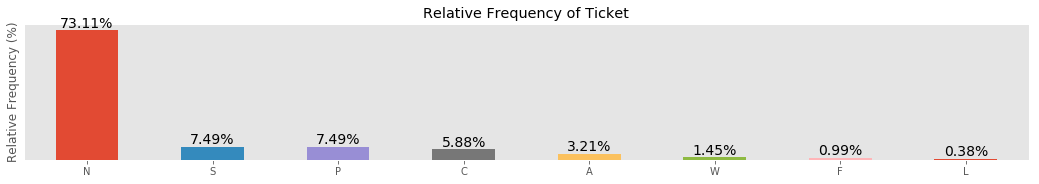

Absolute & Relative Frequency of Ticket :


,Absolute Frequency,Relative Frequency(%)
N,957,73.11
S,98,7.49
P,98,7.49
C,77,5.88
A,42,3.21
W,19,1.45
F,13,0.99
L,5,0.38


In [167]:
'''Keep only the 1st character of Ticket to further reduce the Ticket categories.'''
merged.Ticket = merged.Ticket.apply(lambda x : x[0])
display(merged.Ticket.value_counts())

'''After processing, visualise and count the absolute and relative frequency of updated Ticket.'''
merged.Ticket.agg(absolute_and_relative_freq)

In [168]:
'''Create a function to count total outliers. And plot variables with and without outliers.'''
def outliers(variable):
    # Calculate 1st, 3rd quartiles and iqr.
    q1, q3 = variable.quantile(0.25), variable.quantile(0.75)
    iqr = q3 - q1
    
    # Calculate lower fence and upper fence for outliers
    l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr   # Any values less than l_fence and greater than u_fence are outliers.
    
    # Observations that are outliers
    outliers = variable[(variable<l_fence) | (variable>u_fence)]
    print('Total Outliers of', variable.name,':', outliers.count())
    
    # Drop obsevations that are outliers
    filtered = variable.drop(outliers.index, axis = 0)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2,1)
    
    # Gives space between two subplots
    fig.subplots_adjust(hspace = 1) 
    
    # Plot variable with outliers
    variable.plot.box(vert = False, color = 'coral', grid = False, ax = ax1, title = 'Distribution with Outliers for %s' %variable.name)

    # Plot variable without outliers
    filtered.plot.box(vert = False, color = 'coral', grid = False, ax = ax2, title = 'Distribution without Outliers for %s' %variable.name)

Total Outliers of Age : 9


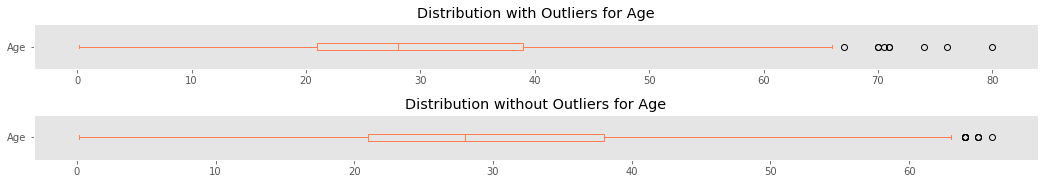

In [169]:
'''Count total outliers of Age. Plot Age with and without outliers.'''
merged.Age.agg(outliers)

Total Outliers of Fare : 171


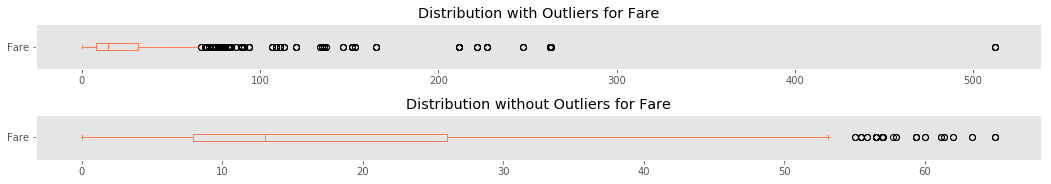

In [170]:
'''Count total outliers of Fare. Plot Fare with and without outliers.'''
merged.Fare.agg(outliers)

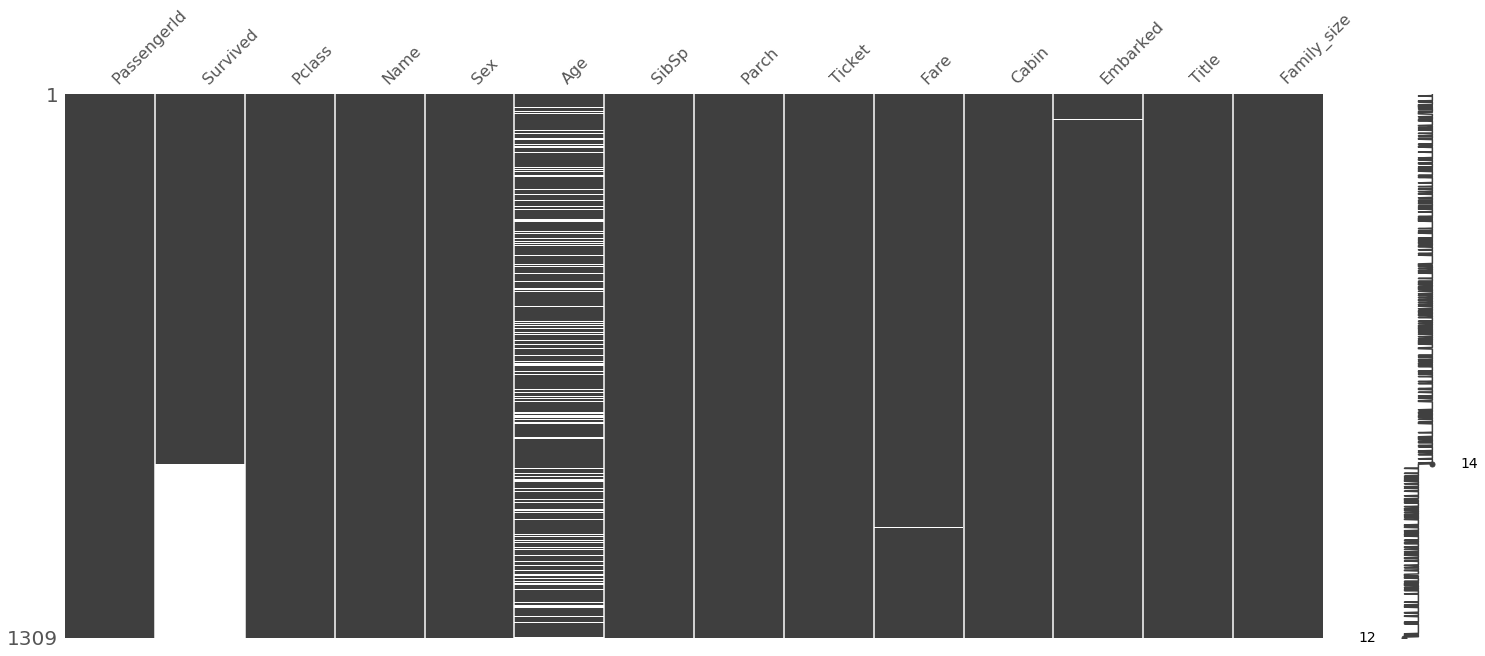

In [171]:
'''We can visualize the missing values for each variable.'''
mn.matrix(merged)
plt.show()

In [172]:
"""Let's count the missing values for each variable."""
bold('**Missing values for each variable:**')
display(merged.isnull().sum())

**Missing values for each variable:**

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         2
Title            0
Family_size      0
dtype: int64

In [173]:
'''Impute missing values of Embarked. Embarked is a categorical variable where S is the most frequent.'''
merged.Embarked.fillna(value = 'S', inplace = True)

'''Impute missing values of Fare. Fare is a numerical variable with outliers. Hence it will be imputed by median.'''
merged.Fare.fillna(value = merged.Fare.median(), inplace = True)

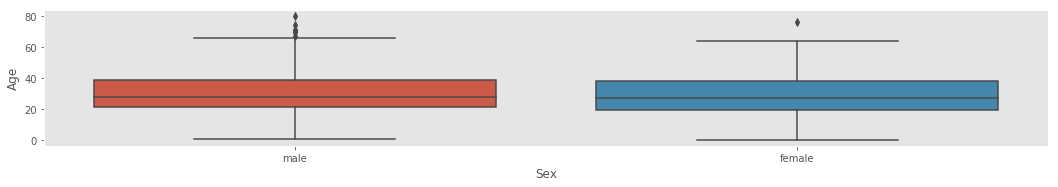

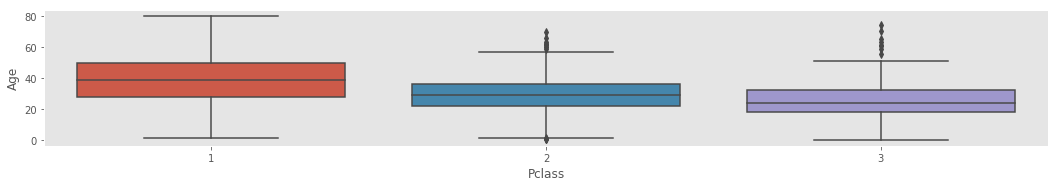

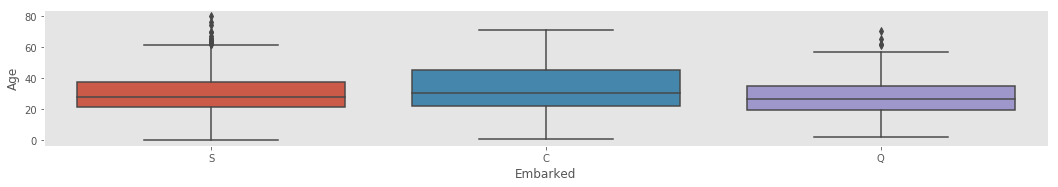

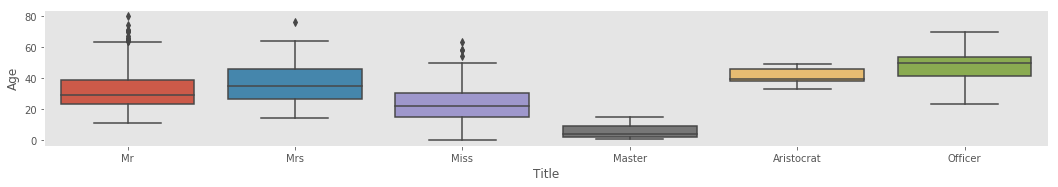

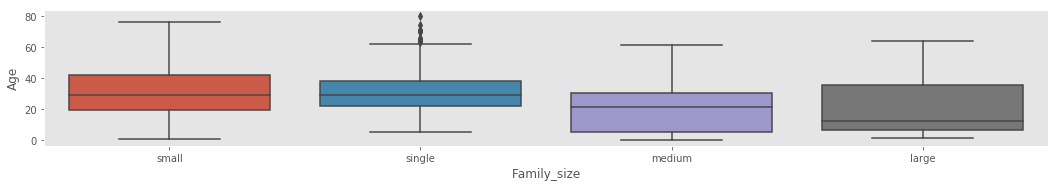

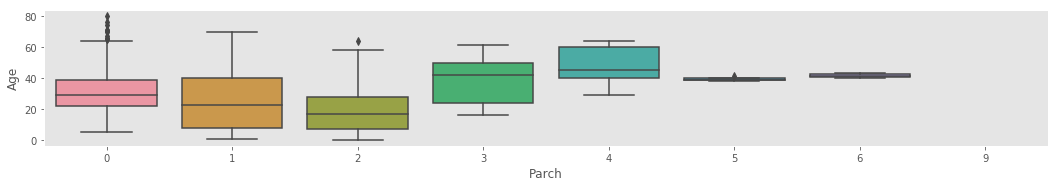

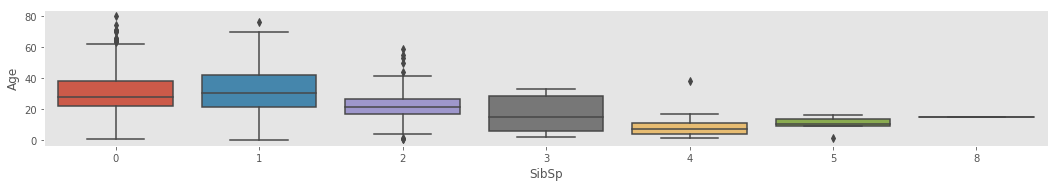

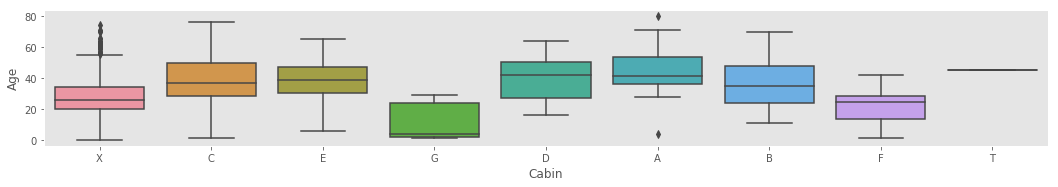

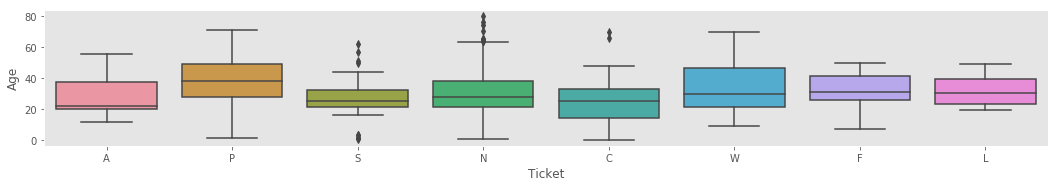

In [174]:
"""Create a boxplot to view the variables correlated with Age. First take the variables we're interested in."""
correlation = merged.loc[:, ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_size', 'Parch', 'SibSp', 'Cabin', 'Ticket']]
for columns in correlation:
    plt.figure(columns)
    sns.boxplot(x = columns, y = merged.Age, data = correlation)

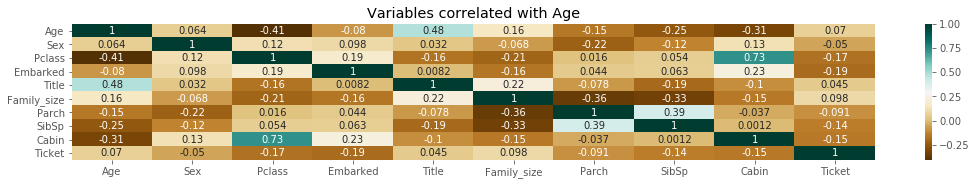

In [175]:
"""Let's plot correlation heatmap to see which variable is highly correlated with Age and if our boxplot interpretation holds true. We need to convert categorical variable into numerical to plot correlation heatmap. So convert categorical variables into numerical."""

from sklearn.preprocessing import LabelEncoder
correlation = correlation.agg(LabelEncoder().fit_transform)
correlation['Age'] = merged.Age # Inserting Age in dataframe correlation
correlation = correlation.set_index('Age').reset_index() # Move Age at index 0.

'''Now create the heatmap correlation.'''
sns.heatmap(correlation.corr(), cmap ='BrBG', annot = True)
plt.title('Variables correlated with Age')
plt.show()

In [176]:
'''Impute Age with median of respective columns (Title and Pclass).'''
merged.Age = merged.groupby(['Title', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

'''So by now we should have no variables with missing values.'''
bold('**Missing values after imputation:**')
display(merged.isnull().sum())

**Missing values after imputation:**

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Title            0
Family_size      0
dtype: int64

In [177]:
"""Let's split the train and test data for bivariate analysis since test data has no Survived values. We need our target variable without missing values to conduct the association test with predictor variables."""
df_train = merged.iloc[:891, :]
df_test = merged.iloc[891:, :]
df_test = df_test.drop(columns = ['Survived'], axis = 1)

'''#1.Create a function that creates boxplot between categorical and numerical variables and calculates biserial correlation.'''
def boxplot_and_correlation(cat,nume):
    '''cat = categorical variable, and nume = numerical variable.'''
    ax = sns.boxplot(x = cat, y = nume)
    
    # Select boxes to change the color
    box = ax.artists[0]
    box1 = ax.artists[1]
    
    # Change the appearance of that box
    box.set_facecolor('red')
    box1.set_facecolor('green')
    
    plt.title('Association between Survived & Fare %s' %nume.name)
    print('Correlation between', nume.name, 'and', cat.name,':', stats.pointbiserialr(nume, cat))
    plt.show()
    return display(ax)

'''#2.Create another function to calculate mean when grouped by categorical variable. And also plot the grouped mean.'''
def nume_grouped_by_cat(nume, cat):
    global ax
    grouped_by_cat = nume.groupby(cat).mean().sort_values( ascending = False)
    grouped_by_cat.rename ({1:'survived', 0:'died'}, axis = 'rows', inplace = True) # Renaming index
    grouped_by_cat = round(grouped_by_cat, 2)
    ax = grouped_by_cat.plot.bar() 
    abs_bar_labels()
    plt.ylabel('Mean %s' %nume.name)
    plt.title('Survivors vs Victims Mean %s' %nume.name)
    print('Mean', nume.name, 'of Survivors vs Victims:')
    return display(grouped_by_cat)

'''#3.This function plots histogram of numerical variable for every class of categorical variable.'''
def nume_hist_by_cat(nume,cat):
    nume[cat == 1].hist(color = ['g'], grid = False)
    nume[cat == 0].hist(color = ['r'], grid = False)
    plt.yticks([])
    plt.xlabel('%s' %nume.name)
    plt.title('Survivors vs Victims Distribution of %s' %nume.name)
    
'''#4.Create a function to calculate anova between numerical and categorical variable.'''
def anova(nume, cat):
    from scipy import stats
    grp_nume_by_cat_1 = nume[cat == 1] # Group our numerical variable by categorical variable(1). Group Fair by survivors
    grp_nume_by_cat_0 = nume[cat == 0] # Group our numerical variable by categorical variable(0). Group Fare by victims
    f_val, p_val = stats.f_oneway(grp_nume_by_cat_1, grp_nume_by_cat_0) # Calculate f statistics and p value
    print('Anova results:', f_val, p_val)  
    
'''#5.Create another function that calculates Tukey's test between our nemurical and categorical variable.'''
def tukey_test(nume, cat):
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey = pairwise_tukeyhsd(endog = nume,  # Numerical data
                             groups = cat,   # Categorical data
                             alpha = 0.05)   # Significance level
    
    summary = tukey.summary()   # See test summary
    return display(summary)        

Correlation between Fare and Survived : PointbiserialrResult(correlation=0.25730652238496243, pvalue=6.120189341921873e-15)


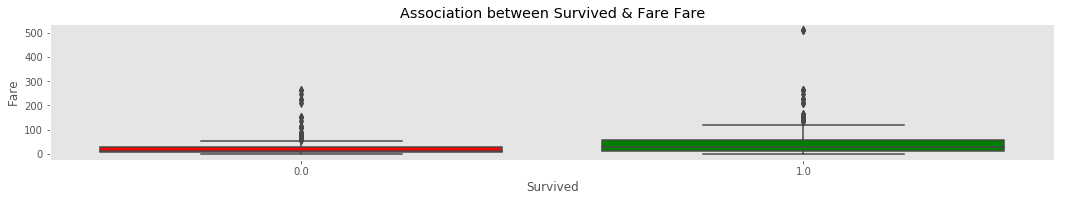

In [178]:
'''Create a boxplot to visualize the strength of association of Survived with Fare. Also calculate biserial correlation.'''
boxplot_and_correlation(df_train.Survived, df_train.Fare)

Mean Fare of Survivors vs Victims:


Survived
survived    48.40
died        22.12
Name: Fare, dtype: float64

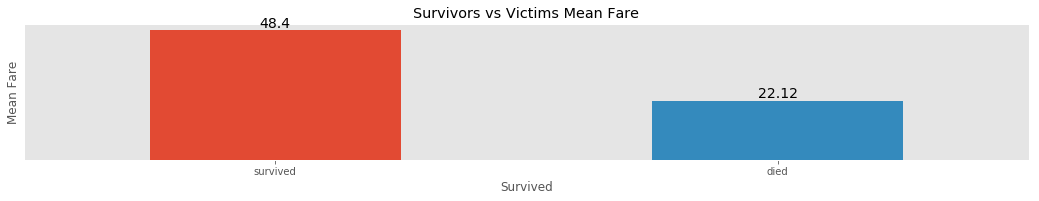

In [179]:
'''So the mean fare of survivors should be much more (positive correlation or boxplot interpretation) than those who died. Calculate mean fare paid by the survivors as well as by the victims.'''
nume_grouped_by_cat(df_train.Fare, df_train.Survived)

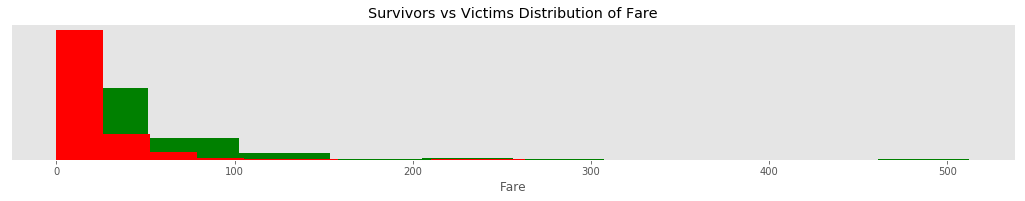

In [180]:
"""Plot histogram of survivor's vs victims fare."""
nume_hist_by_cat(df_train.Fare, df_train.Survived)

In [181]:
"""Let's perform ANOVA between Fare and Survived. One can omit this step. I perform just to show how anova is performed if there were more than two groups in our categorical variable."""
anova(df_train.Fare, df_train.Survived)


Anova results: 63.03076422804448 6.120189341921873e-15


In [182]:
"""Perform Tukey's test using pairwise_tukeyhsd() function. One can omit Anova and Tukey's test for categorical variable less than three levels by performing biserial correlation."""
tukey_test(df_train.Fare, df_train.Survived)

group1,group2,meandiff,lower,upper,reject
0.0,1.0,26.2775,19.7815,32.7735,True


Correlation between Age and Survived : PointbiserialrResult(correlation=-0.05953689941956393, pvalue=0.07569419096180038)


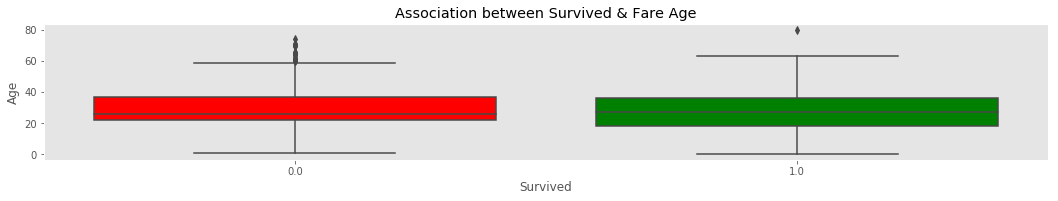

In [183]:
"""Let's create a box plot between Age and Survived to have an idea by how much Age is associated with Survived. Also find point biserial correlation between them."""
boxplot_and_correlation(df_train.Survived, df_train.Age)

Mean Age of Survivors vs Victims:


Survived
died        29.84
survived    28.18
Name: Age, dtype: float64

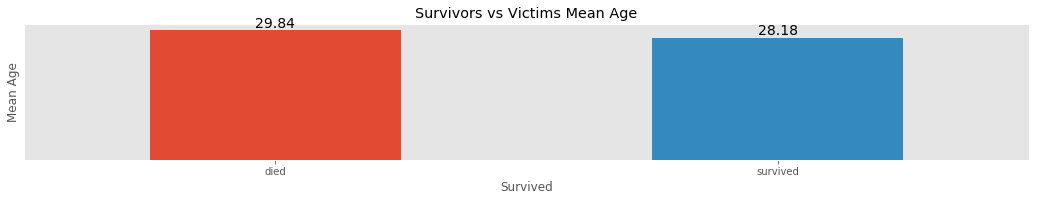

In [184]:
'''So the mean age of survivors should be just less than those who died (small negative correlation and reading boxplot). Calculate the mean age of survivors and victims.'''
nume_grouped_by_cat(df_train.Age, df_train.Survived)

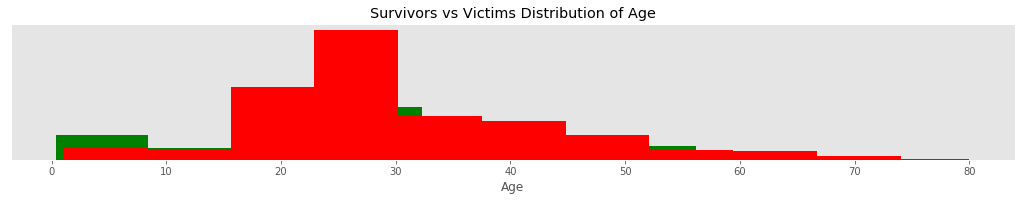

In [185]:
'''Histogram of survivors vs victims age.'''
nume_hist_by_cat(df_train.Age, df_train.Survived)

In [186]:
'''Perform ANOVA between all the levels of Survived (i.e.., 0 and 1) and Age.'''
anova(df_train.Age, df_train.Survived)


Anova results: 3.162396652163441 0.07569419096180038


In [187]:
'''#1.Create a function that calculates absolute and relative frequency of Survived variable by a categorical variable. And then plots the absolute and relative frequency of Survived by a categorical variable.'''
def crosstab(cat, cat_target):
    '''cat = categorical variable, cat_target = our target categorical variable.'''
    global ax, ax1
    cat_grouped_by_cat_target = pd.crosstab(index = cat, columns = cat_target)
    cat_grouped_by_cat_target.rename({0:'Victims', 1:'Survivors'}, axis = 'columns', inplace = True)  # Renaming the columns
    pct_cat_grouped_by_cat_target = round(pd.crosstab(index = cat, columns = cat_target, normalize = 'index')*100, 2)
    pct_cat_grouped_by_cat_target.rename({0:'Victims(%)', 1:'Survivors(%)'}, axis = 'columns', inplace = True)
    print('Survivals and Deaths by', cat.name,':', '\n',cat_grouped_by_cat_target )
    print('\nPercentage Survivals and Deaths by', cat.name, ':','\n', pct_cat_grouped_by_cat_target)
    
    # Plot absolute frequency of Survived by a categorical variable
    ax =  cat_grouped_by_cat_target.plot.bar(color = ['r', 'g'])
    plt.title('Survival vs Death Count by %s' %cat.name)
    abs_bar_labels()
    plt.show()
    
    # Plot relative frequrncy of Survived by a categorical variable
    ax1 = pct_cat_grouped_by_cat_target.plot.bar(color = ['r', 'g'])
    plt.title('Percentage Survival vs Death Count by %s' %cat.name)
    pct_bar_labels()
    plt.show()
    
'''#2.Create a function to calculate chi_square test between a categorical and target categorical variable.'''
def chi_square(cat, cat_target):
    cat_grouped_by_cat_target = pd.crosstab(index = cat, columns = cat_target)
    test_result = stats.chi2_contingency (cat_grouped_by_cat_target)
    print('Chi_square test result between Survived & %s' %cat.name)
    return display(test_result)

'''#3.Finally create another function to calculate Bonferroni-adjusted pvalue for a categorical and target categorical variable.'''
def bonferroni_adjusted(cat, cat_target):
    dummies = pd.get_dummies(cat)
    for columns in dummies:
        crosstab = pd.crosstab(dummies[columns], cat_target)
        print(stats.chi2_contingency(crosstab))
    print('\nColumns:', dummies.columns)

Survivals and Deaths by Sex : 
 Survived  Victims  Survivors
Sex                         
female         81        233
male          468        109

Percentage Survivals and Deaths by Sex : 
 Survived  Victims(%)  Survivors(%)
Sex                               
female         25.80         74.20
male           81.11         18.89


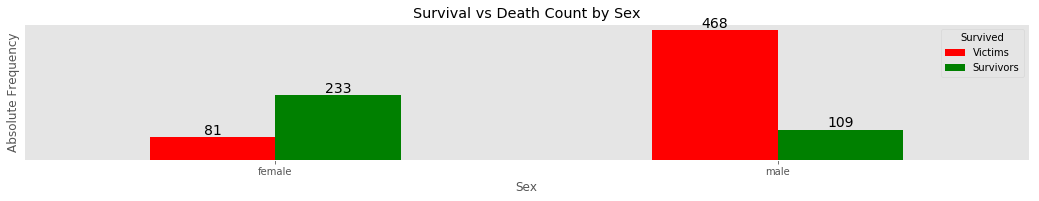

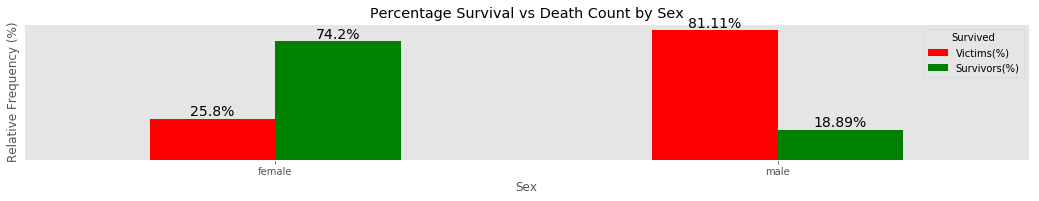

In [188]:
'''Count and plot the no of passergers who survived and died due to their sex in absolute and relative scale.'''
crosstab(df_train.Sex, df_train.Survived)

In [189]:
'''Perform chi-square test of independence between Survived and Sex.'''
chi_square(df_train.Sex, df_train.Survived)

Chi_square test result between Survived & Sex


(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

Survivals and Deaths by Pclass : 
 Survived  Victims  Survivors
Pclass                      
1              80        136
2              97         87
3             372        119

Percentage Survivals and Deaths by Pclass : 
 Survived  Victims(%)  Survivors(%)
Pclass                            
1              37.04         62.96
2              52.72         47.28
3              75.76         24.24


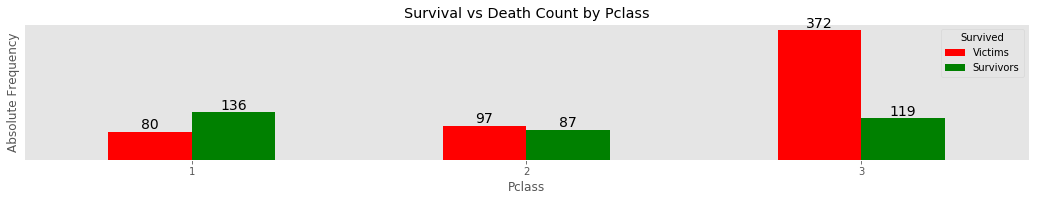

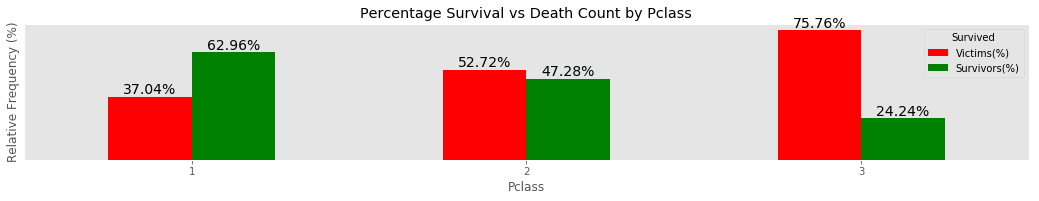

In [190]:
'''Count and plot the number of passengers who survived and died due to their pclass in absolute and relative scale.'''
crosstab(df_train.Pclass, df_train.Survived)

In [191]:
'''Perform chi-square test of independence between Survived and Pclass.'''
chi_square(df_train.Pclass, df_train.Survived)

Chi_square test result between Survived & Pclass


(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

In [192]:
'''Calculate Bonferroni-adjusted pvalue for Pclass (1,2,3) and Survived.'''
bonferroni_adjusted(df_train.Pclass, df_train.Survived)

(71.46583854616047, 2.821002116713357e-17, 1, array([[415.90909091, 259.09090909],
       [133.09090909,  82.90909091]]))
(7.2971925540056475, 0.006906243870048795, 1, array([[435.62626263, 271.37373737],
       [113.37373737,  70.62626263]]))
(91.23179223158795, 1.277904920294387e-21, 1, array([[246.46464646, 153.53535354],
       [302.53535354, 188.46464646]]))

Columns: Int64Index([1, 2, 3], dtype='int64')


Survivals and Deaths by Embarked : 
 Survived  Victims  Survivors
Embarked                    
C              75         93
Q              47         30
S             427        219

Percentage Survivals and Deaths by Embarked : 
 Survived  Victims(%)  Survivors(%)
Embarked                          
C              44.64         55.36
Q              61.04         38.96
S              66.10         33.90


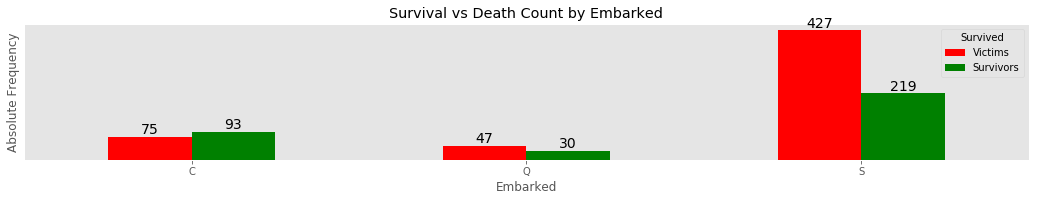

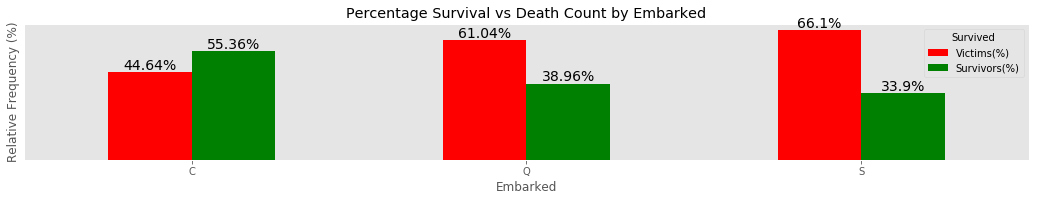

In [193]:
'''Count and plot the survivors and victims by place of embarkation in absolute and relative scale.'''
crosstab(df_train.Embarked, df_train.Survived)

In [194]:
'''Now perform chi-square test to find the association between Embarked and Survived.'''
chi_square(df_train.Embarked, df_train.Survived)

Chi_square test result between Survived & Embarked


(25.964452881874784,
 2.3008626481449577e-06,
 2,
 array([[103.51515152,  64.48484848],
        [ 47.44444444,  29.55555556],
        [398.04040404, 247.95959596]]))

In [195]:
'''Calculate Bonferroni-adjusted pvalue  between Embarked (C,Q,S one by one) and Survived.'''
bonferroni_adjusted(df_train.Embarked, df_train.Survived)

(24.34294028991685, 8.062166851376562e-07, 1, array([[445.48484848, 277.51515152],
       [103.51515152,  64.48484848]]))
(0.00018551307377882246, 0.9891328942213099, 1, array([[501.55555556, 312.44444444],
       [ 47.44444444,  29.55555556]]))
(19.279400244953347, 1.1291808110540787e-05, 1, array([[150.95959596,  94.04040404],
       [398.04040404, 247.95959596]]))

Columns: Index(['C', 'Q', 'S'], dtype='object')


Survivals and Deaths by SibSp : 
 Survived  Victims  Survivors
SibSp                       
0             398        210
1              97        112
2              15         13
3              12          4
4              15          3
5               5          0
8               7          0

Percentage Survivals and Deaths by SibSp : 
 Survived  Victims(%)  Survivors(%)
SibSp                             
0              65.46         34.54
1              46.41         53.59
2              53.57         46.43
3              75.00         25.00
4              83.33         16.67
5             100.00          0.00
8             100.00          0.00


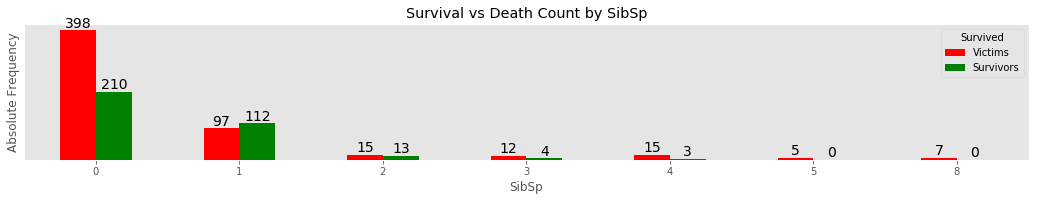

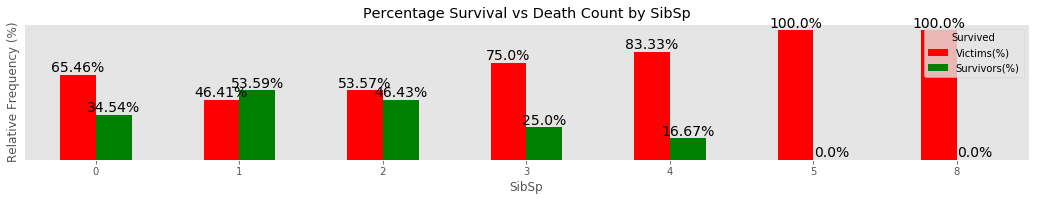

In [196]:
'''Count and plot absolute and relative number of survivors and victims due to SibSp.'''
crosstab(df_train.SibSp, df_train.Survived)

In [197]:
'''Chi-square test between SibSp and Survived.'''
chi_square(df_train.SibSp, df_train.Survived)

Chi_square test result between Survived & SibSp


(37.2717929152043,
 1.5585810465902147e-06,
 6,
 array([[374.62626263, 233.37373737],
        [128.77777778,  80.22222222],
        [ 17.25252525,  10.74747475],
        [  9.85858586,   6.14141414],
        [ 11.09090909,   6.90909091],
        [  3.08080808,   1.91919192],
        [  4.31313131,   2.68686869]]))

Survivals and Deaths by Parch : 
 Survived  Victims  Survivors
Parch                       
0             445        233
1              53         65
2              40         40
3               2          3
4               4          0
5               4          1
6               1          0

Percentage Survivals and Deaths by Parch : 
 Survived  Victims(%)  Survivors(%)
Parch                             
0              65.63         34.37
1              44.92         55.08
2              50.00         50.00
3              40.00         60.00
4             100.00          0.00
5              80.00         20.00
6             100.00          0.00


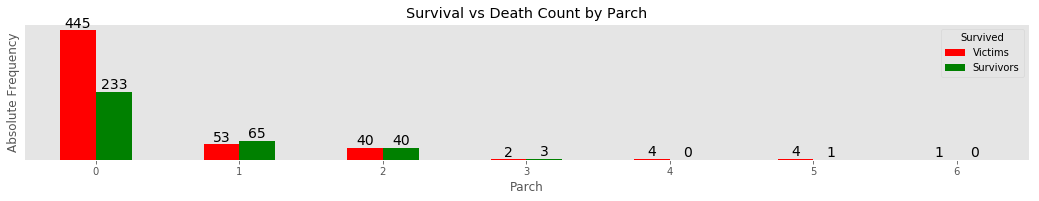

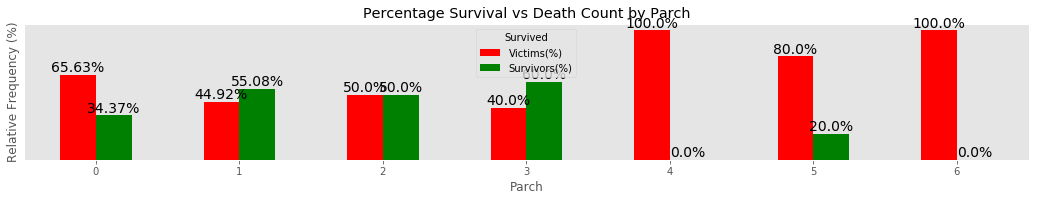

In [198]:
'''Count and visualize absolute and relative number of survivors and victims by Parch.'''
crosstab(df_train.Parch, df_train.Survived)

In [199]:
'''Perform Chi-square test of independence between Parch and Survived.'''
chi_square(df_train.Parch, df_train.Survived)

Chi_square test result between Survived & Parch


(27.925784060236168,
 9.703526421039997e-05,
 6,
 array([[4.17757576e+02, 2.60242424e+02],
        [7.27070707e+01, 4.52929293e+01],
        [4.92929293e+01, 3.07070707e+01],
        [3.08080808e+00, 1.91919192e+00],
        [2.46464646e+00, 1.53535354e+00],
        [3.08080808e+00, 1.91919192e+00],
        [6.16161616e-01, 3.83838384e-01]]))

Survivals and Deaths by Title : 
 Survived    Victims  Survivors
Title                         
Aristocrat        2          3
Master           17         23
Miss             55        130
Mr              436         81
Mrs              26        100
Officer          13          5

Percentage Survivals and Deaths by Title : 
 Survived    Victims(%)  Survivors(%)
Title                               
Aristocrat       40.00         60.00
Master           42.50         57.50
Miss             29.73         70.27
Mr               84.33         15.67
Mrs              20.63         79.37
Officer          72.22         27.78


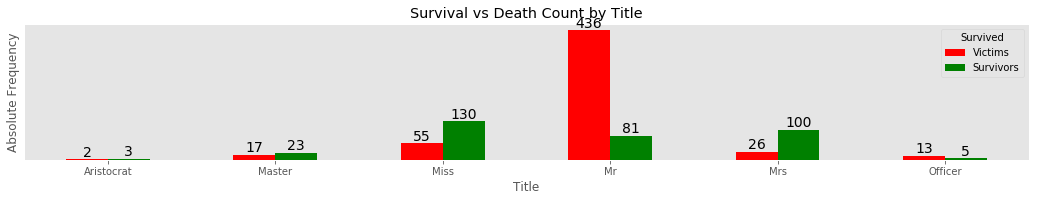

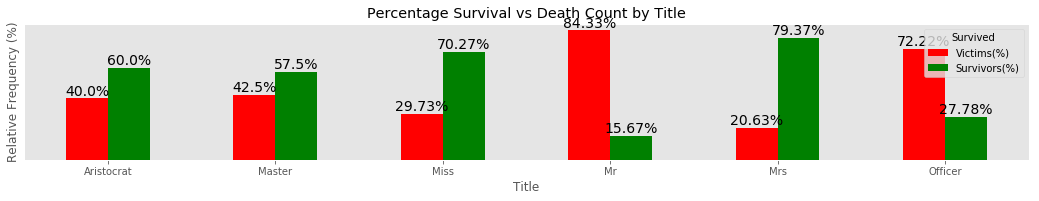

In [200]:
'''Count and visualize absolute and relative number of survivors and victims by Title.'''
crosstab(df_train.Title, df_train.Survived)

In [201]:
'''Perform Chi-square test of independence between Title and Survived.'''
chi_square(df_train.Title, df_train.Survived)

Chi_square test result between Survived & Title


(289.8360961873925,
 1.5325912223703196e-60,
 5,
 array([[  3.08080808,   1.91919192],
        [ 24.64646465,  15.35353535],
        [113.98989899,  71.01010101],
        [318.55555556, 198.44444444],
        [ 77.63636364,  48.36363636],
        [ 11.09090909,   6.90909091]]))

Survivals and Deaths by Family_size : 
 Survived     Victims  Survivors
Family_size                    
large             40          7
medium            20         24
single           374        163
small            115        148

Percentage Survivals and Deaths by Family_size : 
 Survived     Victims(%)  Survivors(%)
Family_size                          
large             85.11         14.89
medium            45.45         54.55
single            69.65         30.35
small             43.73         56.27


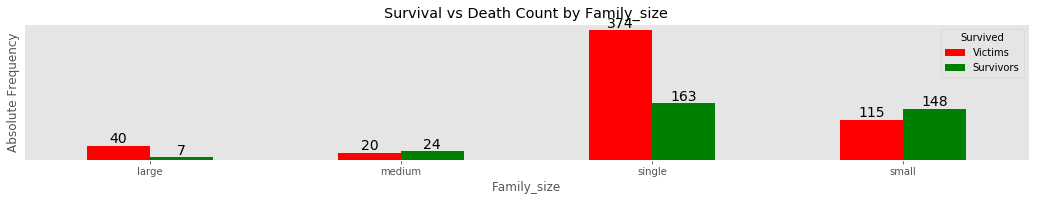

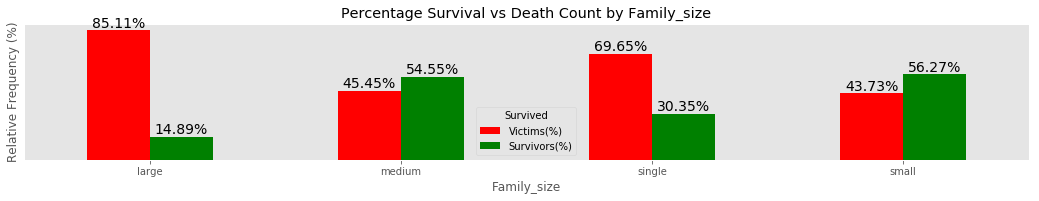

In [202]:
'''Survivors and victims count and percentage count by Family_size. Also plot the absolute and percentage count.'''
crosstab(df_train.Family_size, df_train.Survived)

In [203]:
'''Perform Chi-square test of independence between Family_size and Survived.'''
chi_square(df_train.Family_size, df_train.Survived)

Chi_square test result between Survived & Family_size


(66.05581680279249,
 2.981870009647575e-14,
 3,
 array([[ 28.95959596,  18.04040404],
        [ 27.11111111,  16.88888889],
        [330.87878788, 206.12121212],
        [162.05050505, 100.94949495]]))

In [204]:
'''Calculate Bonferroni-adjusted pvalue  between Family_size and Survived.'''
bonferroni_adjusted(df_train.Family_size, df_train.Survived)

(10.55137053799774, 0.0011610196650239893, 1, array([[520.04040404, 323.95959596],
       [ 28.95959596,  18.04040404]]))
(4.418221527178599, 0.03555707818485421, 1, array([[521.88888889, 325.11111111],
       [ 27.11111111,  16.88888889]]))
(36.00051446773865, 1.9726543846517113e-09, 1, array([[218.12121212, 135.87878788],
       [330.87878788, 206.12121212]]))
(49.42743388214718, 2.058468013374345e-12, 1, array([[386.94949495, 241.05050505],
       [162.05050505, 100.94949495]]))

Columns: Index(['large', 'medium', 'single', 'small'], dtype='object')


Survivals and Deaths by Cabin : 
 Survived  Victims  Survivors
Cabin                       
A               8          7
B              12         35
C              24         35
D               8         25
E               8         24
F               5          8
G               2          2
T               1          0
X             481        206

Percentage Survivals and Deaths by Cabin : 
 Survived  Victims(%)  Survivors(%)
Cabin                             
A              53.33         46.67
B              25.53         74.47
C              40.68         59.32
D              24.24         75.76
E              25.00         75.00
F              38.46         61.54
G              50.00         50.00
T             100.00          0.00
X              70.01         29.99


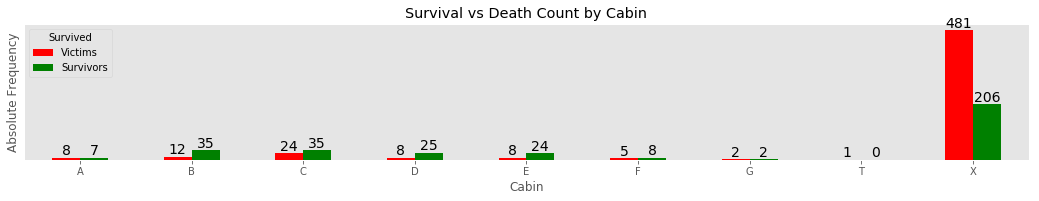

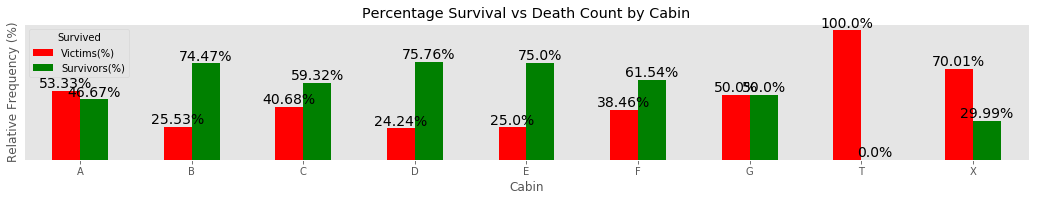

In [205]:
'''Count and plot absolute and relative number of survivors and victims due to Cabin possession.'''
crosstab(df_train.Cabin, df_train.Survived)

In [206]:
"""Perform Chi-square test of independence between Cabin and Survived."""
chi_square(df_train.Cabin, df_train.Survived)

Chi_square test result between Survived & Cabin


(99.16416061888009,
 6.326020042314704e-18,
 8,
 array([[9.24242424e+00, 5.75757576e+00],
        [2.89595960e+01, 1.80404040e+01],
        [3.63535354e+01, 2.26464646e+01],
        [2.03333333e+01, 1.26666667e+01],
        [1.97171717e+01, 1.22828283e+01],
        [8.01010101e+00, 4.98989899e+00],
        [2.46464646e+00, 1.53535354e+00],
        [6.16161616e-01, 3.83838384e-01],
        [4.23303030e+02, 2.63696970e+02]]))

Survivals and Deaths by Ticket : 
 Survived  Victims  Survivors
Ticket                      
A              27          2
C              31         16
F               3          4
L               3          1
N             407        254
P              23         42
S              44         21
W              11          2

Percentage Survivals and Deaths by Ticket : 
 Survived  Victims(%)  Survivors(%)
Ticket                            
A              93.10          6.90
C              65.96         34.04
F              42.86         57.14
L              75.00         25.00
N              61.57         38.43
P              35.38         64.62
S              67.69         32.31
W              84.62         15.38


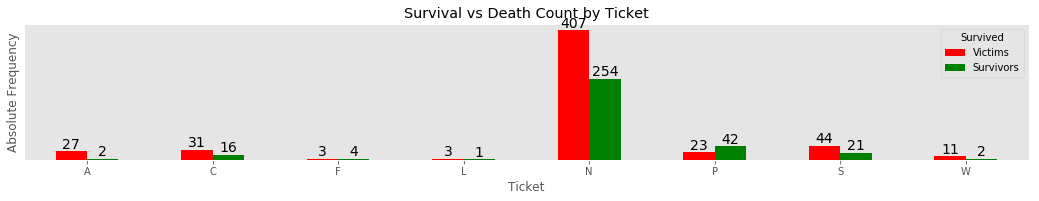

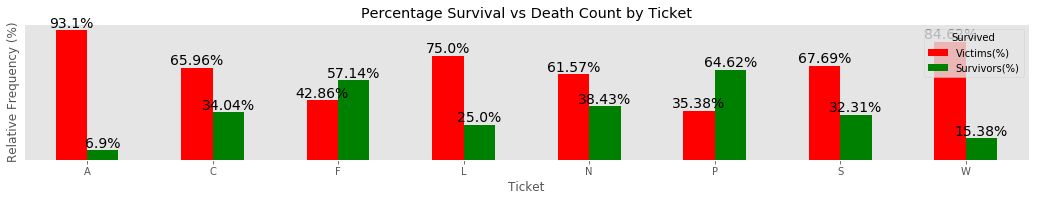

In [207]:
'''Count and plot absolute and relative number of survivors and victims due to Ticket category.'''
crosstab(df_train.Ticket, df_train.Survived)

In [208]:
'''Perform Chi-square test of independence between Ticket and Survived.'''
chi_square(df_train.Ticket, df_train.Survived)

Chi_square test result between Survived & Ticket


(36.7098892616397,
 5.323006335674428e-06,
 7,
 array([[ 17.86868687,  11.13131313],
        [ 28.95959596,  18.04040404],
        [  4.31313131,   2.68686869],
        [  2.46464646,   1.53535354],
        [407.28282828, 253.71717172],
        [ 40.05050505,  24.94949495],
        [ 40.05050505,  24.94949495],
        [  8.01010101,   4.98989899]]))

In [209]:
'''Create a function that plots the impact of 3 predictor variables at a time on a target variable.'''
def multivariate_analysis(cat1, cat2, cat3, cat_target):
    grouped = round(pd.crosstab(index = [cat1, cat2, cat3], columns = cat_target, normalize = 'index')*100, 2)
    grouped.rename({0:'Died%', 1:'Survived%'}, axis = 1, inplace = True)
    ax = grouped.plot.bar(color = ['r', 'g'])
    plt.ylabel('Relative Frequency (%)')

**Sex male seems to be deciding factor for death.**

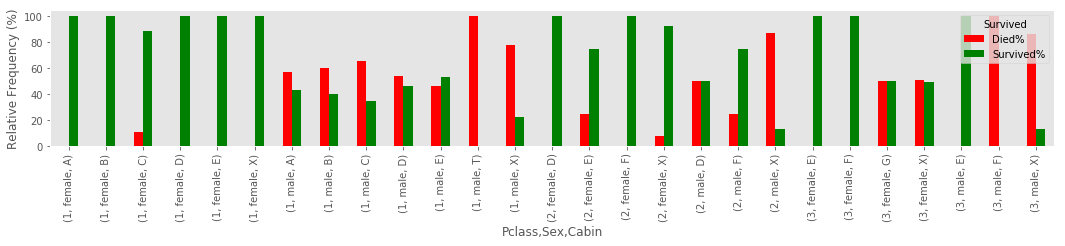

In [210]:
'''Proportion of survivors and victims due to pclass, sex, and cabin.'''
multivariate_analysis(df_train.Pclass, df_train.Sex, df_train.Cabin, df_train.Survived)
bold('**Sex male seems to be deciding factor for death.**')

**Again Sex male seems to be deciding factor for death and female for survival.**

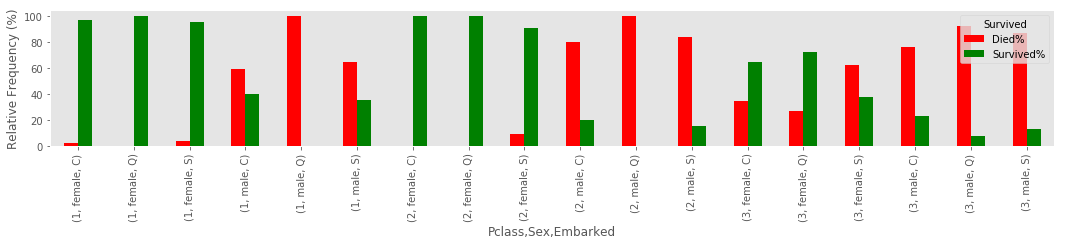

In [211]:
'''Proportion of survivors and victims due to pclass, sex, and embarked.'''
multivariate_analysis(df_train.Pclass, df_train.Sex, df_train.Embarked, df_train.Survived)
bold('**Again Sex male seems to be deciding factor for death and female for survival.**')

**Bigger SibSp and male is responsible more for death.**

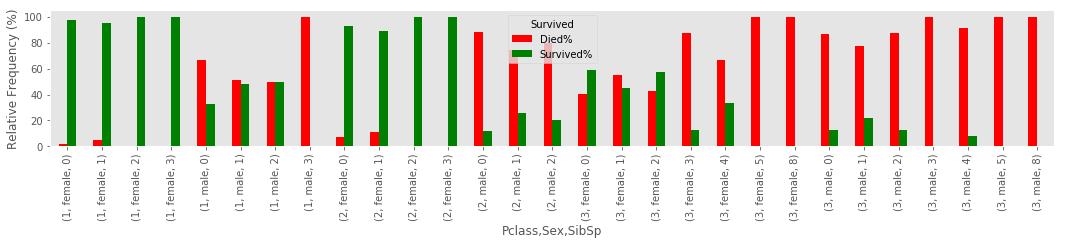

In [212]:
'''Proportion of survivors and victims due to pclass, sex, and SibSp.'''
multivariate_analysis(df_train.Pclass, df_train.Sex, df_train.SibSp, df_train.Survived)
bold('**Bigger SibSp and male is responsible more for death.**')

**Bigger Parch and Sex male is responsible more for death.**

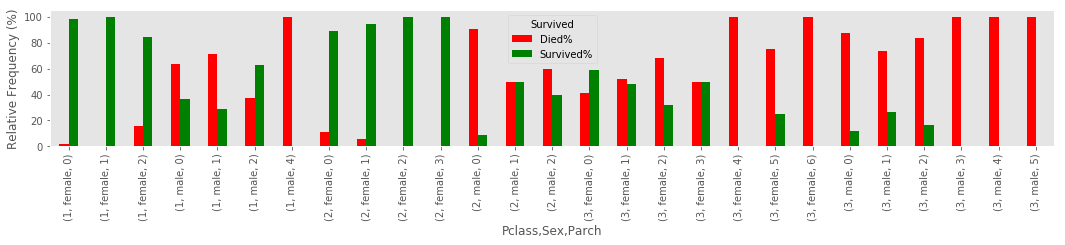

In [213]:
'''Proportion of survivors and victims due to pclass, sex, and Parch.'''
multivariate_analysis(df_train.Pclass, df_train.Sex, df_train.Parch, df_train.Survived)
bold('**Bigger Parch and Sex male is responsible more for death.**')

** Passengers with sex male and title mr mostly died.**

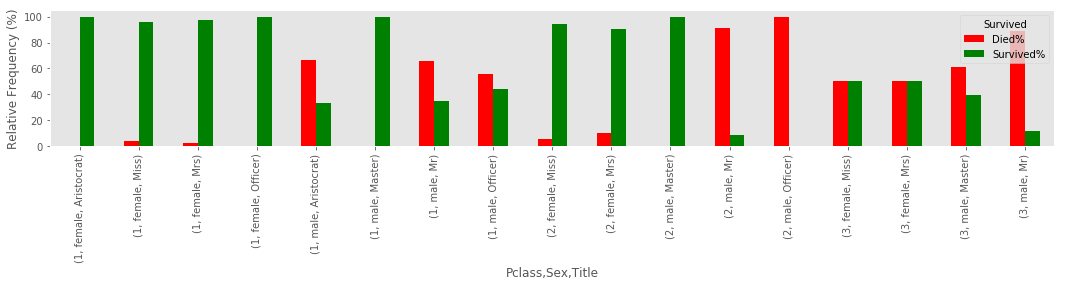

In [214]:
'''Proportion of survivors and victims due to pclass, sex, and title.'''
multivariate_analysis(df_train.Pclass, df_train.Sex, df_train.Title, df_train.Survived)
bold('** Passengers with sex male and title mr mostly died.**')

** Sex male, family_size single and large greatly influence the death ratio.**

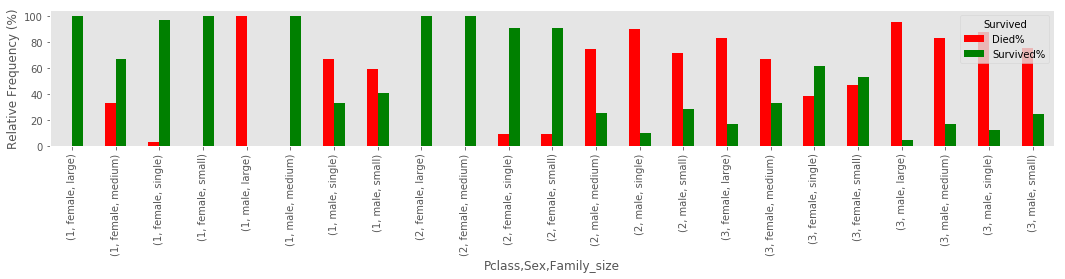

In [215]:
'''Proportion of survivors and victims due to pclass, sex, and family_size.'''
multivariate_analysis(df_train.Pclass, df_train.Sex, df_train.Family_size, df_train.Survived)
bold('** Sex male, family_size single and large greatly influence the death ratio.**')

**Sex female, ticket p and w mostly survived.**

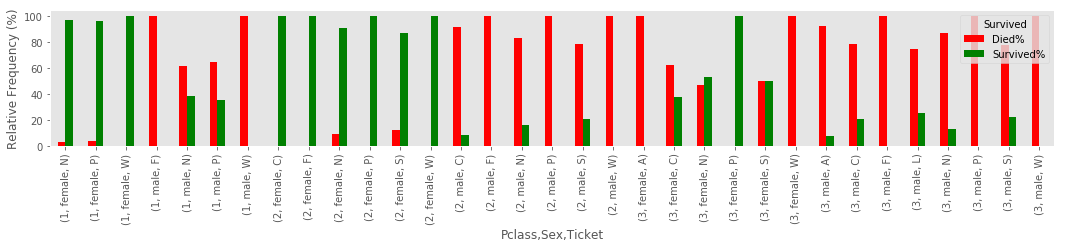

In [216]:
'''Proportion of survivors and victims due to pclass, sex, and Ticket category.'''
multivariate_analysis(df_train.Pclass, df_train.Sex, df_train.Ticket, df_train.Survived)
bold('**Sex female, ticket p and w mostly survived.**')

**Title mrs, master and cabin x had best survival ratio.**

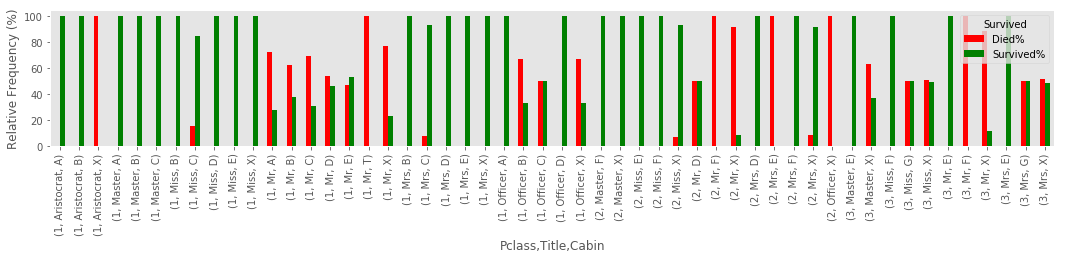

In [217]:
'''Proportion of survivors and victims due to pclass, title, and cabin.'''
multivariate_analysis(df_train.Pclass, df_train.Title, df_train.Cabin, df_train.Survived)
bold('**Title mrs, master and cabin x had best survival ratio.**')

**Family_size small, medium and sex female had best survival chance.**

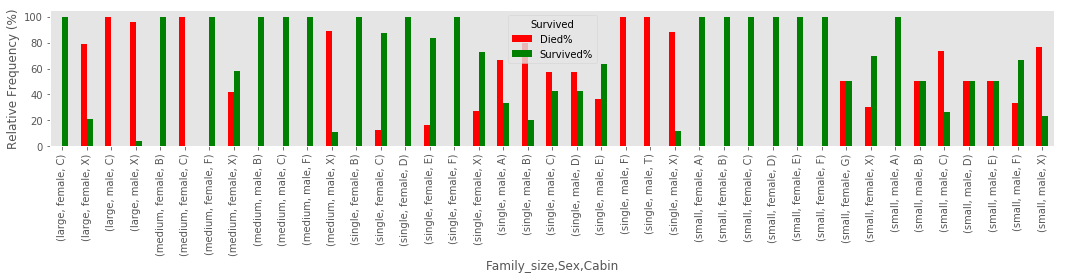

In [218]:
'''Proportion of survivors and victims due to family_size, sex, and cabin.'''
multivariate_analysis(df_train.Family_size, df_train.Sex, df_train.Cabin, df_train.Survived)
bold('**Family_size small, medium and sex female had best survival chance.**')

**Title aristocrat, sex female and family_size small mostly survived.**

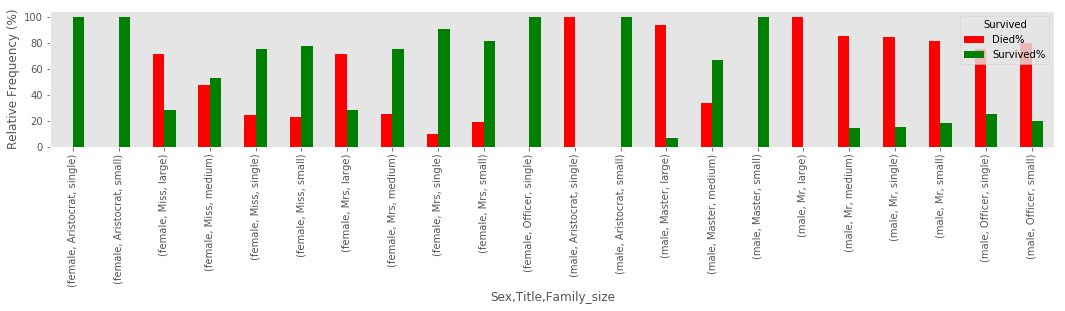

In [219]:
'''Proportion of survivors and victims due to sex, title, and family_size.'''
multivariate_analysis(df_train.Sex, df_train.Title, df_train.Family_size, df_train.Survived)
bold('**Title aristocrat, sex female and family_size small mostly survived.**')

**Title aristocrat, miss, mrs and sex female mostly survived.**

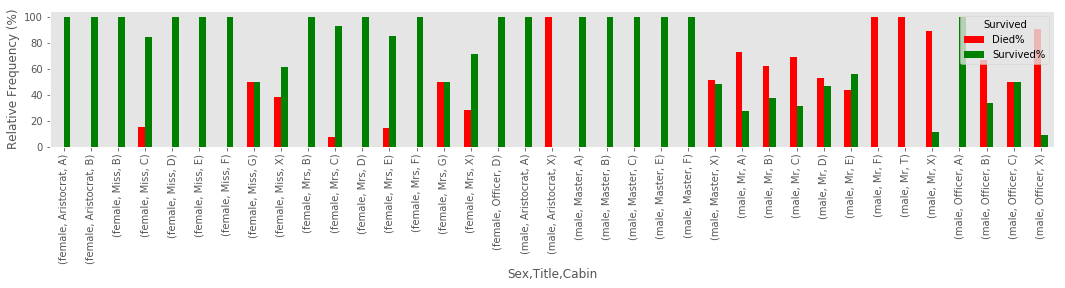

In [220]:
'''Proportion of survivors and victims due to sex, title, and cabin.'''
multivariate_analysis(df_train.Sex, df_train.Title, df_train.Cabin, df_train.Survived)
bold('**Title aristocrat, miss, mrs and sex female mostly survived.**')


**Embarked c, sex female and title master and aristocrat had best survival rate.**

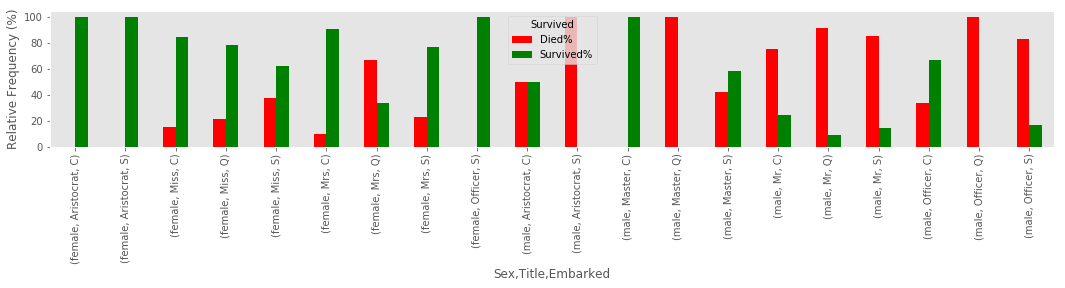

In [221]:
'''Proportion of survivors and victims due to sex, title, and embarked.'''
multivariate_analysis(df_train.Sex, df_train.Title, df_train.Embarked, df_train.Survived)
bold('**Embarked c, sex female and title master and aristocrat had best survival rate.**')


**Ticker n, w and sex male and title mr mostly died.**

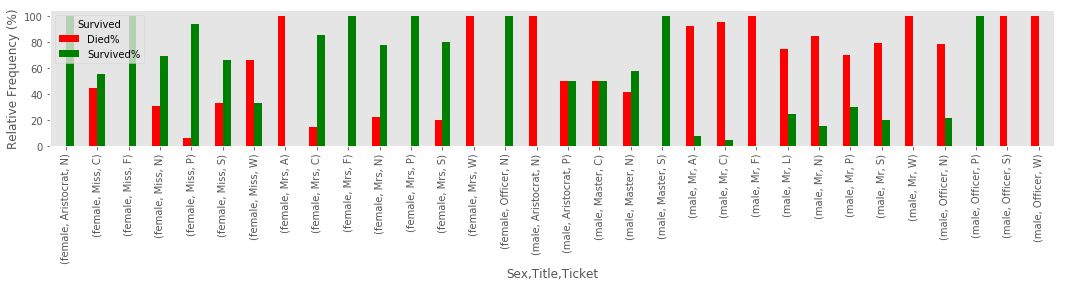

In [222]:
"""Proportion of survivors and victims due to sex, title, and Ticket."""
multivariate_analysis(df_train.Sex, df_train.Title, df_train.Ticket, df_train.Survived)
bold('**Ticker n, w and sex male and title mr mostly died.**')

In [223]:
'''Create bin categories for Age.'''
label_names = ['infant','child','teenager','young_adult','adult','aged']

'''Create range for each bin categories of Age.'''
cut_points = [0,5,12,18,35,60,81]

'''Create and view categorized Age with original Age.'''
merged['Age_binned'] = pd.cut(merged.Age, cut_points, labels = label_names)
display(merged[['Age', 'Age_binned']].head(2))

,Age,Age_binned
0,22.0,young_adult
1,38.0,adult


In [224]:
'''Create bin categories for Fare.'''
groups = ['low','medium','high','very_high']

'''Create range for each bin categories of Fare.'''
cut_points = [-1, 130, 260, 390, 520]

'''Create and view categorized Fare with original Fare.'''
merged['Fare_binned'] = pd.cut(merged.Fare, cut_points, labels = groups)
display(merged[['Fare', 'Fare_binned']].head(2))

,Fare,Fare_binned
0,7.2500,low
1,71.2833,low


In [225]:
"""Let's see all the variables we currently have with their category."""
display(merged.head(2))

'''Drop the features that would not be useful anymore.'''
merged.drop(columns = ['Name', 'Age', 'Fare'], inplace = True, axis = 1)

'''Features after dropping.'''
bold('**Features remaining after dropping:**')
display(merged.columns)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size,Age_binned,Fare_binned
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A,7.2500,X,S,Mr,small,young_adult,low
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,P,71.2833,C,C,Mrs,small,adult,low


**Features remaining after dropping:**

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket',
       'Cabin', 'Embarked', 'Title', 'Family_size', 'Age_binned',
       'Fare_binned'],
      dtype='object')

In [226]:
'''Checking current data types.'''
bold('**Current variable Data Types:**')
display(merged.dtypes)

**Current variable Data Types:**

PassengerId       int64
Survived        float64
Pclass            int64
Sex              object
SibSp             int64
Parch             int64
Ticket           object
Cabin            object
Embarked         object
Title            object
Family_size      object
Age_binned     category
Fare_binned    category
dtype: object

In [227]:
'''Correcting data types, converting into categorical variables.'''
merged.loc[:, ['Pclass', 'Sex', 'Embarked', 'Cabin', 'Title', 'Family_size', 'Ticket']] = merged.loc[:, ['Pclass', 'Sex', 'Embarked', 'Cabin', 'Title', 'Family_size', 'Ticket']].astype('category')

'''Due to merging there are NaN values in Survived for test set observations.'''
merged.Survived = merged.Survived.dropna().astype('int')#Converting without dropping NaN throws an error.

'''Check if data types have been corrected.'''
bold('**Data types after correction:**')
display(merged.dtypes)

**Data types after correction:**

PassengerId       int64
Survived          int64
Pclass         category
Sex            category
SibSp             int64
Parch             int64
Ticket         category
Cabin          category
Embarked       category
Title          category
Family_size    category
Age_binned     category
Fare_binned    category
dtype: object

In [228]:
'''Convert categorical data into numeric to feed our machine learning model.'''
merged = pd.get_dummies(merged)

"""Let's visualize the updated dataset."""
display(merged.head(2))

,PassengerId,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Ticket_A,Ticket_C,Ticket_F,Ticket_L,Ticket_N,Ticket_P,Ticket_S,Ticket_W,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X,Embarked_C,Embarked_Q,Embarked_S,Title_Aristocrat,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Family_size_large,Family_size_medium,Family_size_single,Family_size_small,Age_binned_infant,Age_binned_child,Age_binned_teenager,Age_binned_young_adult,Age_binned_adult,Age_binned_aged,Fare_binned_low,Fare_binned_medium,Fare_binned_high,Fare_binned_very_high
0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,2,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0


In [229]:
"""Let's split the train and test set to feed machine learning algorithm."""
df_train = merged.iloc[:891, :]
df_test  = merged.iloc[891:, :]

'''Drop passengerid from train set and Survived from test set.'''
df_train = df_train.drop(columns = ['PassengerId'], axis = 1)
df_test = df_test.drop(columns = ['Survived'], axis = 1)

'''Extract data sets as input and output for machine learning models.'''
X_train = df_train.drop(['Survived'], axis = 1) # Input matrix as pandas dataframe (dim:891*47).
y_train = df_train['Survived'] #Output vector as pandas series (dim:891*1)

"""Extract test set"""
X_test  = df_test.drop("PassengerId", axis = 1).copy()

'''See the dimensions of input and output data set.'''
display(X_train.shape, X_test.shape, y_train.shape)

(891, 47)

(418, 47)

(891,)

In [230]:
'''#1.Create a function that returns train accuracy of different models.'''
def train_accuracy(model):
        model.fit(X_train, y_train)
        train_accuracy = model.score(X_train, y_train)
        return train_accuracy
    
'''#2.Create another function that returns mean cross validation score for different models.'''
def x_val_score(model):
    from sklearn.model_selection import cross_val_score
    x_val_score = cross_val_score(model, X_train, y_train, cv = 10, scoring = 'accuracy').mean()
    return x_val_score

'''#3.Create a function to tune hyperparameters of the selected models.'''
def tune_hyperparameters(model, params):
    from sklearn.model_selection import GridSearchCV
    global best_params, best_score
    # Construct grid search object with 10 fold cross validation.
    grid = GridSearchCV(model, params, verbose = 2, cv = 10, scoring = 'accuracy', n_jobs = -1)
    # Fit using grid search.
    grid.fit(X_train, y_train)
    best_params, best_score = grid.best_params_, grid.best_score_
    return best_params, best_score

'''#4.Create a function that compares cross validation scores with tunned scores for different models by plotting them.'''
def compare_scores(accuracy):
    global ax1    
    ax1 = accuracy.plot.bar(legend = False, color = ['rosybrown'])
    # Removes square brackets and quotes from column name after converting list.
    plt.title('Models %s' % ''.join(list(accuracy.columns)))
    pct_bar_labels()
    plt.ylabel('% Accuracy')
    plt.show()
    
'''#5.Create a function that plot feature importance by the best selected models.'''
def plot_feature_importance(model):
    importance = pd.DataFrame({'Feature_name': X_train.columns,
                              'Importance': np.round(model.feature_importances_,3)})
    importance = importance.sort_values(by = 'Importance', ascending = False).set_index('Feature_name')
    importance.plot.bar(legend = False, color = ['brown'])
    
'''#6.This function plots leanring curves for different models.'''
def plot_learning_curve(model):
    from sklearn.model_selection import learning_curve
    # Create feature matrix and target vector
    X, y = X_train, y_train
    # Create CV training and test scores for various training set sizes
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv = 10, 
                                                    scoring='accuracy', n_jobs = -1, 
                                                    train_sizes = np.linspace(0.01, 1.0, 17))
                                                    # 17 different sizes of the training set

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)

    # Draw lines
    plt.plot(train_sizes, train_mean, 'o-', color = 'red',  label = 'Training score')
    plt.plot(train_sizes, test_mean, 'o-', color = 'green', label = 'Cross-validation score')
    
    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha = 0.1, color = 'r') # Alpha controls band transparency.
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha = 0.1, color = 'g')

    # Create plot
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy Score') 
    plt.legend(loc = 'best')
    plt.grid()

In [231]:
"""Building machine learning models: 
We will try 7 different classifiers to find the best classifier after tunning model's hyperparameters that will best generalize the unseen(test) data."""

'''#1.Logistic Regression'''
from sklearn.linear_model import LogisticRegression
lr_train_accuracy = train_accuracy(LogisticRegression())

'''#2.Support Vector Machines'''
from sklearn.svm import SVC
svm_train_accuracy = train_accuracy(SVC(gamma = 'auto'))

'''#3.Random Forest Classifier'''
from sklearn.ensemble import RandomForestClassifier
rf_train_accuracy = train_accuracy(RandomForestClassifier(random_state = 43, n_estimators = 100))

'''#4.KNN'''
from sklearn.neighbors import KNeighborsClassifier
knn_train_accuracy = train_accuracy(KNeighborsClassifier())

'''#5.Gaussian Naive Bayes'''
from sklearn.naive_bayes import  GaussianNB
gnb_train_accuracy = train_accuracy(GaussianNB())

'''#6.Decision Tree Classifier'''
from sklearn.tree import DecisionTreeClassifier
dt_train_accuracy = train_accuracy(DecisionTreeClassifier(random_state = 43))

'''#7.Gradient Boosting Classifier'''
from sklearn.ensemble import GradientBoostingClassifier
gbc_train_accuracy = train_accuracy(GradientBoostingClassifier(random_state = 43))

'''Models with best training accuracy:'''
train_accuracy = round(pd.DataFrame({'Train_accuracy(%)':[lr_train_accuracy, svm_train_accuracy, rf_train_accuracy, knn_train_accuracy, gnb_train_accuracy, dt_train_accuracy, gbc_train_accuracy]})*100, 2)
train_accuracy.index = ['LR', 'SVC', 'RF', 'KNN', 'GNB', 'DT', 'GBC']
sorted_train_accuracy = train_accuracy.sort_values(by = 'Train_accuracy(%)', ascending = False) 
display(sorted_train_accuracy)

,Train_accuracy(%)
RF,90.91
DT,90.91
GBC,86.64
KNN,85.30
LR,84.06
SVC,83.05
GNB,80.02


In [232]:
"""Let's perform k-fold cross validation to find the best classifier with the best cross validation accuracy that will best generalize the previously unseen data."""
lr_x_val_score  = x_val_score(LogisticRegression())
svc_x_val_score = x_val_score(SVC(gamma = 'auto'))
rf_x_val_score  = x_val_score(RandomForestClassifier(random_state = 47, n_estimators = 100))
knn_x_val_score = x_val_score(KNeighborsClassifier())
gnb_x_val_score = x_val_score(GaussianNB())
dt_x_val_score  = x_val_score(DecisionTreeClassifier(random_state = 43))
gbc_x_val_score = x_val_score(GradientBoostingClassifier(random_state = 43))

'''Models with best cross validation score:'''
x_val_score = round(pd.DataFrame({'X_val_score(%)':[lr_x_val_score, svc_x_val_score, rf_x_val_score, knn_x_val_score, gnb_x_val_score, dt_x_val_score, gbc_x_val_score]})*100, 2)
x_val_score.index = ['LR', 'SVC', 'RF', 'KNN', 'GNB', 'DT', 'GBC']
sorted_x_val_score = x_val_score.sort_values(by = 'X_val_score(%)', ascending = False) 
display(sorted_x_val_score)

,X_val_score(%)
LR,82.72
SVC,82.71
GBC,82.61
KNN,81.61
RF,80.49
DT,80.14
GNB,77.69


In [233]:
"""Define all the models' hyperparameters one by one first::"""

'''Define hyperparameters the logistic regression will be tuned with. For LR, the following hyperparameters are usually tunned.'''
lr_params = {'penalty':['l1', 'l2'],
             'C': np.logspace(0, 4, 10)}

'''For GBC, the following hyperparameters are usually tunned.'''
gbc_params = {'learning_rate': [0.01, 0.02, 0.05, 0.01],
              'max_depth': [4, 6, 8],
              'max_features': [1.0, 0.3, 0.1], 
              'min_samples_split': [ 2, 3, 4],
              'random_state':[43]}

'''For SVC, the following hyperparameters are usually tunned.'''
svc_params = {'C': [6,7,8,9,10,11,12], 
              'kernel': ['linear','rbf'],
              'gamma': [0.5,0.2,0.1, 0.001, 0.0001]}

'''For DT, the following hyperparameters are usually tunned.'''
dt_params = {'max_features': ['auto', 'sqrt', 'log2'],
             'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
             'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
             'random_state':[43]}

'''For RF, the following hyperparameters are usually tunned.'''
rf_params = {'criterion':['gini','entropy'],
             'n_estimators':[10,15,20,25,30],
             'min_samples_leaf':[1,2,3],
             'min_samples_split':[3,4,5,6,7], 
             'max_features':['sqrt', 'auto', 'log2'],
             'random_state':[44]}

'''For KNN, the following hyperparameters are usually tunned.'''
knn_params = {'n_neighbors':[5,6,7,8,9,10],
              'leaf_size':[1,2,3,5],
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree','kd_tree','brute']}

In [234]:
'''Tune LR hyperparameters.'''
tune_hyperparameters(LogisticRegression(), params = lr_params)
lr_best_params, lr_best_score = best_params, best_score
print('Best score:', lr_best_score)
print('Best parameters:', lr_best_params)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.7s


Best score: 0.8294051627384961
Best parameters: {'C': 2.7825594022071245, 'penalty': 'l1'}


[Parallel(n_jobs=-1)]: Done 193 out of 200 | elapsed:   10.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   10.5s finished


In [235]:
"""Tune GBC's hyperparameters."""
tune_hyperparameters(GradientBoostingClassifier(), params = gbc_params)
gbc_best_score, gbc_best_params = best_score, best_params

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  2.3min finished


In [236]:
"""Tune SVC's hyperparameters."""
tune_hyperparameters(SVC(), params = svc_params)
svc_best_score, svc_best_params = best_score, best_params

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 70 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 592 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:   17.7s finished


In [237]:
"""Tune DT's hyperparameters."""
tune_hyperparameters(DecisionTreeClassifier(), params = dt_params)
dt_best_score, dt_best_params = best_score, best_params
ignore_warnings()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 462 candidates, totalling 4620 fits


[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 4620 out of 4620 | elapsed:   10.7s finished


In [238]:
"""Tune RF's hyperparameters."""
tune_hyperparameters(RandomForestClassifier(), params = rf_params)
rf_best_score, rf_best_params = best_score, best_params
ignore_warnings()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 450 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3946 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  2.5min finished


In [239]:
"""Tune KNN's hyperparameters."""
tune_hyperparameters(KNeighborsClassifier(), params = knn_params)
knn_best_score, knn_best_params = best_score, best_params

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 661 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 1391 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1913 out of 1920 | elapsed:  1.6min remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  1.6min finished


In [240]:
'''Create a dataframe of tunned scores and sort them in descending order.'''
tunned_scores = round(pd.DataFrame({'Tunned_accuracy(%)': [lr_best_score, gbc_best_score, svc_best_score, dt_best_score, rf_best_score, knn_best_score]})*100,2)
tunned_scores.index = ['LR', 'GBC', 'SVC', 'DT', 'RF', 'KNN']
sorted_tunned_scores = tunned_scores.sort_values(by = 'Tunned_accuracy(%)', ascending = False)
display(sorted_tunned_scores)

,Tunned_accuracy(%)
GBC,84.06
RF,84.06
SVC,83.28
KNN,83.28
LR,82.94
DT,81.93


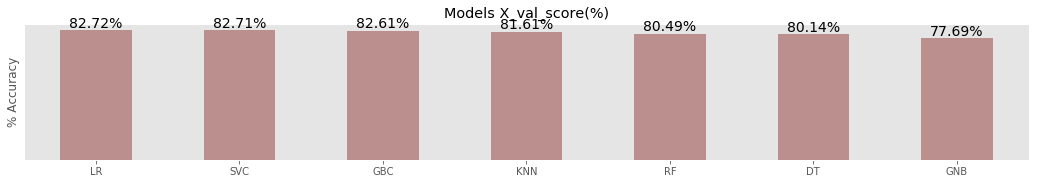

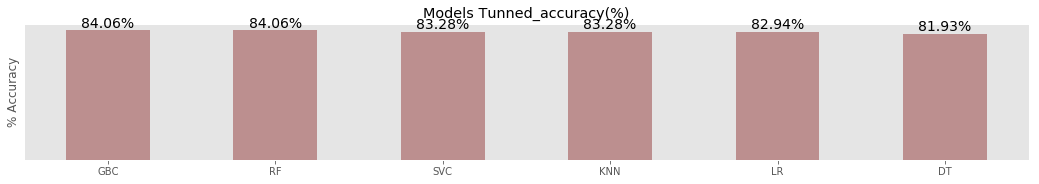

In [241]:
'''Compare cross validation scores with tunned scores to find the best model.'''
compare_scores(sorted_x_val_score)
compare_scores(sorted_tunned_scores)

In [242]:
"""Train and predict using rf's best hyperparameters."""
rf = RandomForestClassifier(**rf_best_params)
rf.fit(X_train, y_train)
y_pred_rf_tunned = rf.predict(X_test)

"""Train and predict using gbc's best hyperparameters."""
gbc = GradientBoostingClassifier(**gbc_best_params)
gbc.fit(X_train, y_train)
y_pred_gbc_tunned = gbc.predict(X_test)

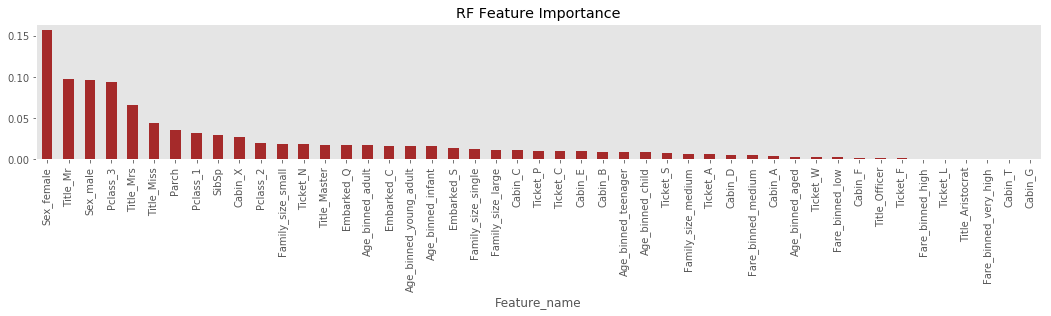

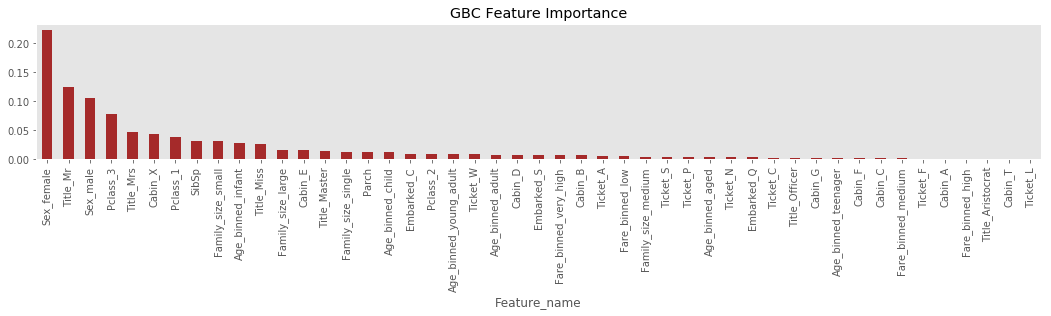

In [243]:
'''Plot feature importance by rf and gbc.'''
plot_feature_importance(rf)
plt.title('RF Feature Importance')
plt.show()

plot_feature_importance(gbc)
plt.title('GBC Feature Importance')
plt.show()

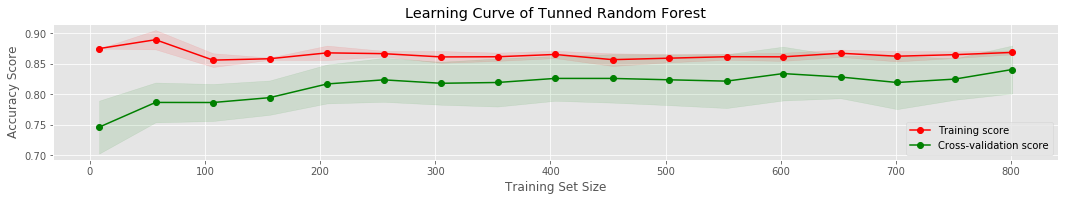

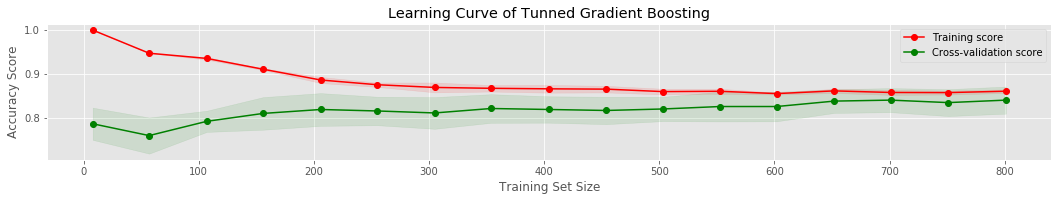

In [244]:
'''Plot learning curves of best rf classifier.'''
plot_learning_curve(rf)
plt.title('Learning Curve of Tunned Random Forest')
plt.show()

'''Plot learning curve of best gbc.'''
plot_learning_curve(gbc)
plt.title('Learning Curve of Tunned Gradient Boosting')
plt.show()

In [245]:
'''Return prediction to use it in another function.'''
def x_val_predict(model):
    from sklearn.model_selection import cross_val_predict
    predicted = cross_val_predict(model, X_train, y_train, cv = 10)
    return predicted # Now we can use it in another function by assigning the function to its return value.

'''#1.Confusion matrix.'''
def confusion_matrix(model):
    predicted = x_val_predict(model)
    confusion_matrix = pd.crosstab(y_train, predicted, rownames = ['Actual'], colnames = ['Predicted/Classified'], margins = True) # We use pandas crosstab
    return display(confusion_matrix)

'''#2.Precision score.'''
def precision_score(model):
    from sklearn.metrics import precision_score
    predicted = x_val_predict(model)
    precision_score = precision_score(y_train, predicted)
    return display(precision_score)

'''#3.Recall score.'''
def recall_score(model):
    from sklearn.metrics import recall_score
    predicted = x_val_predict(model)
    recall_score = recall_score(y_train, predicted)
    return display(recall_score) 

'''#4.Specificity score.'''
def specificity_score(model):
    from sklearn.metrics import confusion_matrix
    predicted = x_val_predict(model)
    tn, fp, fn, tp = confusion_matrix(y_train, predicted).ravel()
    specificity_score = tn / (tn + fp)
    return display(specificity_score)

'''#5.F1 score.'''
def f1_score(model):
    from sklearn.metrics import f1_score
    predicted = x_val_predict(model)
    f1_score = f1_score(y_train, predicted)
    return display(f1_score)

'''#6.Classification report.'''
def classification_report(model):
    from sklearn.metrics import classification_report
    predicted = x_val_predict(model)
    classification_report = classification_report(y_train, predicted)
    return print(classification_report)

'''#7.Plot precision-recall vs threshold curve.'''
def precision_recall_vs_threshold(model):
    from sklearn.metrics import precision_recall_curve
    probablity = model.predict_proba(X_train)[:, 1]
    precision, recall, threshold = precision_recall_curve(y_train, probablity)
    plt.figure(figsize = (18, 4))
    plt.plot(threshold, precision[:-1], 'b-', label = 'precision', lw = 3.7)
    plt.plot(threshold, recall[:-1], 'g', label = 'recall', lw = 3.7)
    plt.xlabel('Threshold')
    plt.legend(loc = 'best')
    plt.ylim([0, 1])
    
'''#8.Plot recall vs precision curve.'''
def plot_precision_vs_recall(model):
    from sklearn.metrics import precision_recall_curve
    probablity = model.predict_proba(X_train)[:, 1]
    precision, recall, threshold = precision_recall_curve(y_train, probablity)
    plt.figure(figsize = (18, 5))
    plt.plot(recall, precision, 'r-', lw = 3.7)
    plt.ylabel('Recall')
    plt.xlabel('Precision')
    plt.axis([0, 1.5, 0, 1.5])

'''#9.Plot ROC curve with AUC score.'''
def plot_roc_and_auc_score(model):
    from sklearn.metrics import roc_curve, roc_auc_score
    probablity = model.predict_proba(X_train)[:, 1]
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, probablity)
    auc_score = roc_auc_score(y_train, probablity)
    plt.figure(figsize = (18, 5))
    plt.plot(false_positive_rate, true_positive_rate, label = "ROC CURVE, AREA = "+ str(auc_score))
    plt.plot([0, 1], [0, 1], 'black', lw = 3.7)
    plt.xlabel('False Positive Rate (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.axis([0, 1, 0, 1])
    plt.legend(loc = 4)

In [246]:
'''Calculate confusion matrix of rf and gbc.'''
confusion_matrix(rf)
confusion_matrix(gbc)

Predicted/Classified,0,1,All
Actual,,,
0,504,45,549
1,97,245,342
All,601,290,891


Predicted/Classified,0,1,All
Actual,,,
0,492,57,549
1,85,257,342
All,577,314,891


In [247]:
'''Compute precision score for rf and gbc.'''
precision_score(rf)
precision_score(gbc)

0.8448275862068966

0.8184713375796179

In [248]:
'''Compute recall score for rf and gbc.'''
recall_score(rf)
recall_score(gbc)

0.716374269005848

0.7514619883040936

In [249]:
'''Calculate specificity score for rf and gbc.'''
specificity_score(rf)
specificity_score(gbc)

0.9180327868852459

0.8961748633879781

In [250]:
'''Calculate f1 score for rf and gbc.'''
f1_score(rf)
f1_score(gbc)

0.7753164556962026

0.7835365853658537

In [251]:
'''Calculate classification report for rf and gbc.'''
classification_report(rf)
classification_report(gbc)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       549
           1       0.84      0.72      0.78       342

   micro avg       0.84      0.84      0.84       891
   macro avg       0.84      0.82      0.83       891
weighted avg       0.84      0.84      0.84       891

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       549
           1       0.82      0.75      0.78       342

   micro avg       0.84      0.84      0.84       891
   macro avg       0.84      0.82      0.83       891
weighted avg       0.84      0.84      0.84       891



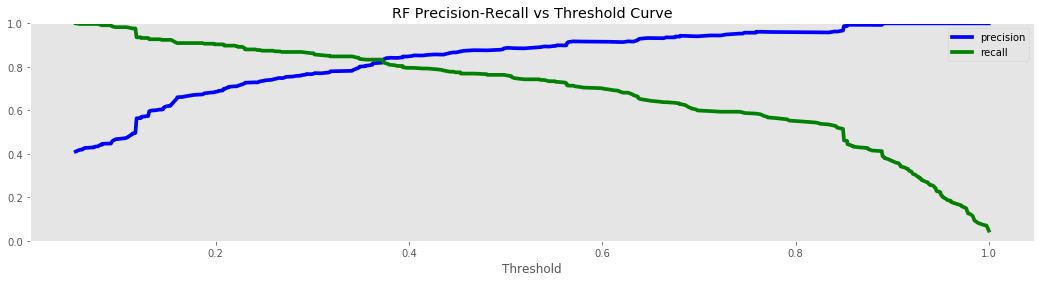

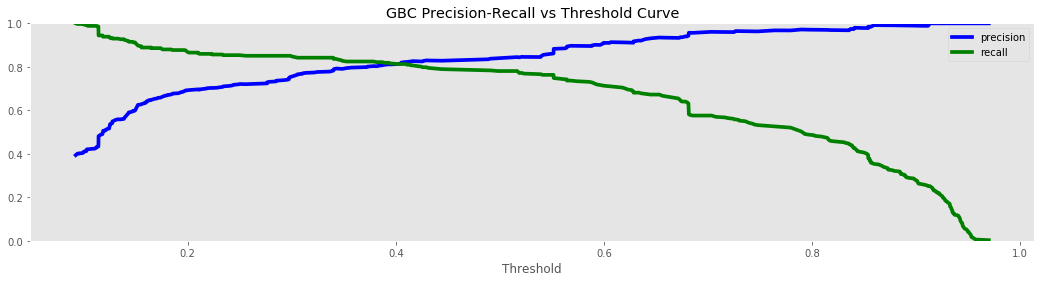

In [252]:
'''Plot precision-recall vs threshold curve for rf and gbc.'''
precision_recall_vs_threshold(rf)
plt.title('RF Precision-Recall vs Threshold Curve')
plt.show()

precision_recall_vs_threshold(gbc)
plt.title('GBC Precision-Recall vs Threshold Curve')
plt.show()

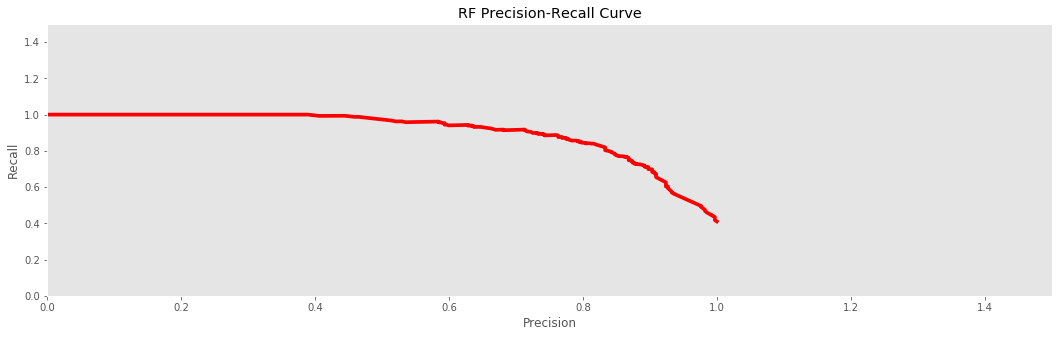

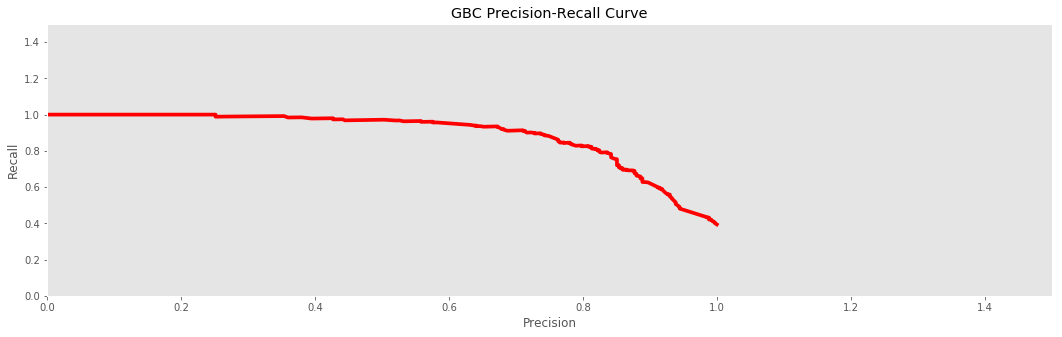

In [253]:
'''Plot recall vs precision curve of rf and gbc.'''
plot_precision_vs_recall(rf)
plt.title('RF Precision-Recall Curve' )
plt.show()

plot_precision_vs_recall(gbc)
plt.title('GBC Precision-Recall Curve' )
plt.show()

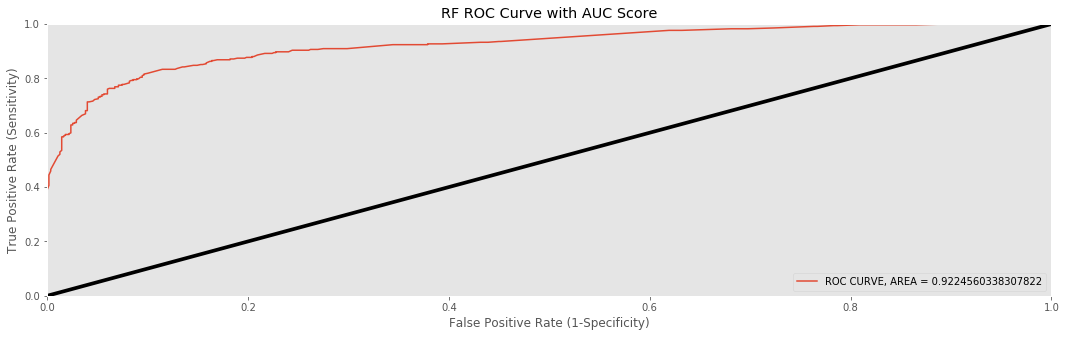

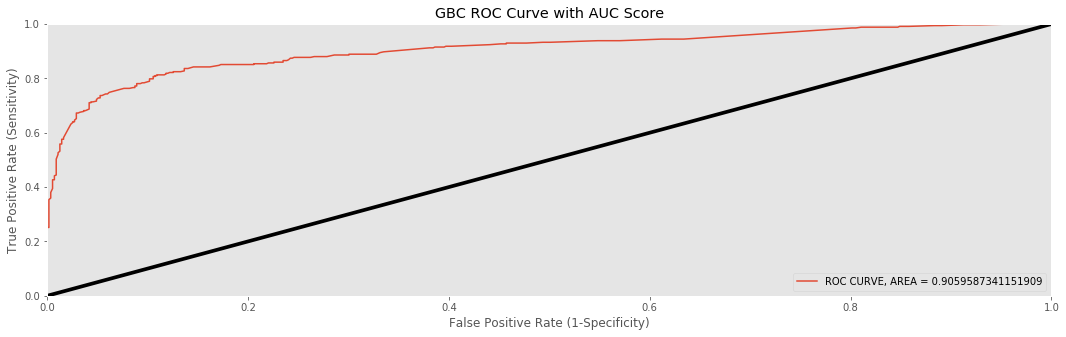

In [254]:
'''Plot roc curve and auc score for rf and gbc.'''
plot_roc_and_auc_score(rf)
plt.title('RF ROC Curve with AUC Score')
plt.show()

plot_roc_and_auc_score(gbc)
plt.title('GBC ROC Curve with AUC Score')
plt.show()

In [255]:
'''Submission with the most accurate random forest classifier.'''
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_rf_tunned})
submission.to_csv('submission_rf.csv', index = False)


'''Submission with the most accurate gradient boosting classifier.'''
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_gbc_tunned})
submission.to_csv('submission_gbc.csv', index = False)